In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
file_path = "charity_data.csv"
application_df = pd.read_csv(file_path)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
#  YOUR CODE GOES HERE

In [3]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
unique_values
#  YOUR CODE GOES HERE

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
unique_values = unique_values.loc[unique_values > 10]
unique_values

APPLICATION_TYPE      17
CLASSIFICATION        71
ASK_AMT             8747
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
Application_type_df = application_df.APPLICATION_TYPE.value_counts()
Application_type_df
#  YOUR CODE GOES HERE

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

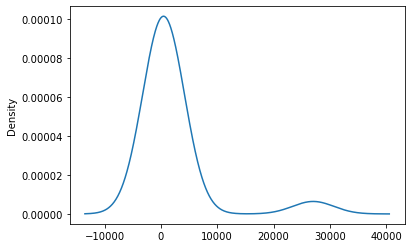

In [8]:
# Visualize the value counts of APPLICATION_TYPE
Application_type_df.plot.density()
#  YOUR CODE GOES HERE

In [9]:
# Determine which values to replace if counts are less than ...?
replace_values = list(Application_type_df[Application_type_df < 150].index)
# REplace the DataFrame
for values in replace_values:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(values, "Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
CLASSIFICATION_type_df = application_df.CLASSIFICATION.value_counts()
CLASSIFICATION_type_df
#  YOUR CODE GOES HERE

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1900        1
C1728        1
C1283        1
C8210        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

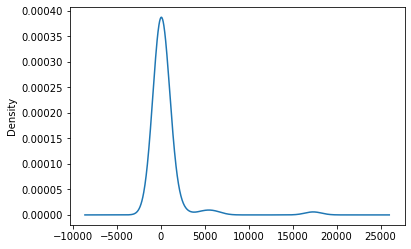

In [11]:
# Visualize the value counts of CLASSIFICATION
CLASSIFICATION_type_df.plot.density()
#  YOUR CODE GOES HERE

In [12]:
# Determine which values to replace if counts are less than ..?
replace_values2 = list(CLASSIFICATION_type_df[CLASSIFICATION_type_df < 1880].index)
# REplace the DataFrame
for values in replace_values2:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(values, "Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application
#  YOUR CODE GOES HERE

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application]))
#  YOUR CODE GOES HERE

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application)
encode_df.head(10)

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application, 1)
application_df.head()
#  YOUR CODE GOES HERE

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], axis=1).values

#  YOUR CODE GOES HERE

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#  YOUR CODE GOES HERE

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[2])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 25

#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation= "linear")
)

#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation="linear"))
#  YOUR CODE GOES HERE

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3600      
                                                                 
 dense_1 (Dense)             (None, 25)                2025      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)
#  YOUR CODE GOES HERE

In [21]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])
#  YOUR CODE GOES HERE

Epoch 1/100
  1/804 [..............................] - ETA: 49:42 - loss: 6.2664 - accuracy: 0.5938
Epoch 00001: saving model to checkpoints/weights.01.hdf5
  5/804 [..............................] - ETA: 14s - loss: 7.6161 - accuracy: 0.5063  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 14/804 [..............................] - ETA: 11s - loss: 8.5732 - accuracy: 0.4442
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 18/804 [..............................] - ETA: 21s - loss: 8.4087 - accuracy: 0.4549
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 22s - loss: 8.3391 - accuracy: 0.4594
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 25/804 [..............................] - ETA: 20s - loss: 8.4644 - accuracy: 0.4512
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 30/804 [>.............................] - ETA: 21s - loss: 8.5641 - accuracy: 0.4448
Epoch 00001: saving model to checkpoints

285/804 [=========>....................] - ETA: 12s - loss: 8.2047 - accuracy: 0.4681
Epoch 00001: saving model to checkpoints/weights.01.hdf5
290/804 [=========>....................] - ETA: 12s - loss: 8.2045 - accuracy: 0.4681
Epoch 00001: saving model to checkpoints/weights.01.hdf5
295/804 [==========>...................] - ETA: 12s - loss: 8.2043 - accuracy: 0.4681
Epoch 00001: saving model to checkpoints/weights.01.hdf5
304/804 [==========>...................] - ETA: 11s - loss: 8.2215 - accuracy: 0.4670
Epoch 00001: saving model to checkpoints/weights.01.hdf5
309/804 [==========>...................] - ETA: 11s - loss: 8.2085 - accuracy: 0.4678
Epoch 00001: saving model to checkpoints/weights.01.hdf5
312/804 [==========>...................] - ETA: 11s - loss: 8.1991 - accuracy: 0.4684
Epoch 00001: saving model to checkpoints/weights.01.hdf5
315/804 [==========>...................] - ETA: 11s - loss: 8.2022 - accuracy: 0.4683
Epoch 00001: saving model to checkpoints/weights.01.hdf5

575/804 [====================>.........] - ETA: 4s - loss: 8.2138 - accuracy: 0.4675
Epoch 00001: saving model to checkpoints/weights.01.hdf5
580/804 [====================>.........] - ETA: 4s - loss: 8.2145 - accuracy: 0.4675
Epoch 00001: saving model to checkpoints/weights.01.hdf5
585/804 [====================>.........] - ETA: 4s - loss: 8.2135 - accuracy: 0.4675
Epoch 00001: saving model to checkpoints/weights.01.hdf5
590/804 [=====================>........] - ETA: 4s - loss: 8.2157 - accuracy: 0.4674
Epoch 00001: saving model to checkpoints/weights.01.hdf5
595/804 [=====================>........] - ETA: 4s - loss: 8.2123 - accuracy: 0.4676
Epoch 00001: saving model to checkpoints/weights.01.hdf5
600/804 [=====================>........] - ETA: 4s - loss: 8.2041 - accuracy: 0.4681
Epoch 00001: saving model to checkpoints/weights.01.hdf5
605/804 [=====================>........] - ETA: 4s - loss: 8.2009 - accuracy: 0.4683
Epoch 00001: saving model to checkpoints/weights.01.hdf5
610/80

 61/804 [=>............................] - ETA: 18s - loss: 8.4237 - accuracy: 0.4539
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 66/804 [=>............................] - ETA: 17s - loss: 8.4501 - accuracy: 0.4522
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 73/804 [=>............................] - ETA: 17s - loss: 8.3794 - accuracy: 0.4568
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 79/804 [=>............................] - ETA: 19s - loss: 8.4691 - accuracy: 0.4509
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 81/804 [==>...........................] - ETA: 20s - loss: 8.4861 - accuracy: 0.4498
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 87/804 [==>...........................] - ETA: 20s - loss: 8.5103 - accuracy: 0.4483
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 93/804 [==>...........................] - ETA: 23s - loss: 8.4537 - accuracy: 0.4519
Epoch 00002: saving model to checkpoints/weights.02.hdf5

346/804 [===========>..................] - ETA: 13s - loss: 8.3171 - accuracy: 0.4608
Epoch 00002: saving model to checkpoints/weights.02.hdf5
351/804 [============>.................] - ETA: 13s - loss: 8.3016 - accuracy: 0.4618
Epoch 00002: saving model to checkpoints/weights.02.hdf5
359/804 [============>.................] - ETA: 12s - loss: 8.3073 - accuracy: 0.4614
Epoch 00002: saving model to checkpoints/weights.02.hdf5
361/804 [============>.................] - ETA: 12s - loss: 8.3107 - accuracy: 0.4612
Epoch 00002: saving model to checkpoints/weights.02.hdf5
366/804 [============>.................] - ETA: 12s - loss: 8.3196 - accuracy: 0.4606
Epoch 00002: saving model to checkpoints/weights.02.hdf5
371/804 [============>.................] - ETA: 12s - loss: 8.3101 - accuracy: 0.4613
Epoch 00002: saving model to checkpoints/weights.02.hdf5
380/804 [=============>................] - ETA: 11s - loss: 8.3175 - accuracy: 0.4608
Epoch 00002: saving model to checkpoints/weights.02.hdf5

641/804 [======================>.......] - ETA: 4s - loss: 8.2629 - accuracy: 0.4643
Epoch 00002: saving model to checkpoints/weights.02.hdf5
646/804 [=======================>......] - ETA: 3s - loss: 8.2617 - accuracy: 0.4644
Epoch 00002: saving model to checkpoints/weights.02.hdf5
651/804 [=======================>......] - ETA: 3s - loss: 8.2589 - accuracy: 0.4646
Epoch 00002: saving model to checkpoints/weights.02.hdf5
656/804 [=======================>......] - ETA: 3s - loss: 8.2614 - accuracy: 0.4644
Epoch 00002: saving model to checkpoints/weights.02.hdf5
661/804 [=======================>......] - ETA: 3s - loss: 8.2587 - accuracy: 0.4646
Epoch 00002: saving model to checkpoints/weights.02.hdf5
666/804 [=======================>......] - ETA: 3s - loss: 8.2625 - accuracy: 0.4643
Epoch 00002: saving model to checkpoints/weights.02.hdf5
671/804 [========================>.....] - ETA: 3s - loss: 8.2620 - accuracy: 0.4644
Epoch 00002: saving model to checkpoints/weights.02.hdf5
677/80

127/804 [===>..........................] - ETA: 11s - loss: 8.1186 - accuracy: 0.4737
Epoch 00003: saving model to checkpoints/weights.03.hdf5
132/804 [===>..........................] - ETA: 11s - loss: 8.1470 - accuracy: 0.4718
Epoch 00003: saving model to checkpoints/weights.03.hdf5
137/804 [====>.........................] - ETA: 11s - loss: 8.1382 - accuracy: 0.4724
Epoch 00003: saving model to checkpoints/weights.03.hdf5
142/804 [====>.........................] - ETA: 11s - loss: 8.1232 - accuracy: 0.4734
Epoch 00003: saving model to checkpoints/weights.03.hdf5
147/804 [====>.........................] - ETA: 11s - loss: 8.1125 - accuracy: 0.4741
Epoch 00003: saving model to checkpoints/weights.03.hdf5
156/804 [====>.........................] - ETA: 10s - loss: 8.1358 - accuracy: 0.4726
Epoch 00003: saving model to checkpoints/weights.03.hdf5
157/804 [====>.........................] - ETA: 11s - loss: 8.1392 - accuracy: 0.4723
Epoch 00003: saving model to checkpoints/weights.03.hdf5

424/804 [==============>...............] - ETA: 6s - loss: 8.2218 - accuracy: 0.4670
Epoch 00003: saving model to checkpoints/weights.03.hdf5
427/804 [==============>...............] - ETA: 6s - loss: 8.2216 - accuracy: 0.4670
Epoch 00003: saving model to checkpoints/weights.03.hdf5
432/804 [===============>..............] - ETA: 6s - loss: 8.2202 - accuracy: 0.4671
Epoch 00003: saving model to checkpoints/weights.03.hdf5
437/804 [===============>..............] - ETA: 6s - loss: 8.2265 - accuracy: 0.4667
Epoch 00003: saving model to checkpoints/weights.03.hdf5
443/804 [===============>..............] - ETA: 5s - loss: 8.2402 - accuracy: 0.4658
Epoch 00003: saving model to checkpoints/weights.03.hdf5
447/804 [===============>..............] - ETA: 5s - loss: 8.2452 - accuracy: 0.4655
Epoch 00003: saving model to checkpoints/weights.03.hdf5
452/804 [===============>..............] - ETA: 5s - loss: 8.2414 - accuracy: 0.4657
Epoch 00003: saving model to checkpoints/weights.03.hdf5
459/80

712/804 [=========================>....] - ETA: 1s - loss: 8.2399 - accuracy: 0.4658
Epoch 00003: saving model to checkpoints/weights.03.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 8.2409 - accuracy: 0.4657
Epoch 00003: saving model to checkpoints/weights.03.hdf5
722/804 [=========================>....] - ETA: 1s - loss: 8.2392 - accuracy: 0.4659
Epoch 00003: saving model to checkpoints/weights.03.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 8.2422 - accuracy: 0.4657
Epoch 00003: saving model to checkpoints/weights.03.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 8.2393 - accuracy: 0.4658
Epoch 00003: saving model to checkpoints/weights.03.hdf5
737/804 [==========================>...] - ETA: 1s - loss: 8.2409 - accuracy: 0.4657
Epoch 00003: saving model to checkpoints/weights.03.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 8.2352 - accuracy: 0.4661
Epoch 00003: saving model to checkpoints/weights.03.hdf5
747/80


Epoch 00004: saving model to checkpoints/weights.04.hdf5
258/804 [========>.....................] - ETA: 4s - loss: 8.2636 - accuracy: 0.4643
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
268/804 [=========>....................] - ETA: 4s - loss: 8.2844 - accuracy: 0.4629
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
278/804 [=========>....................] - ETA: 4s - loss: 8.2569 - accuracy: 0.4647
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 8.2579 - accuracy: 0.4646
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 8.2382 - accuracy: 0.4659
Epoch 00004: saving model to checkpoints/weights.04.hdf5


586/804 [====================>.........] - ETA: 2s - loss: 8.2669 - accuracy: 0.4641
Epoch 00004: saving model to checkpoints/weights.04.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 8.2634 - accuracy: 0.4643
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 8.2574 - accuracy: 0.4647
Epoch 00004: saving model to checkpoints/weights.04.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 8.2641 - accuracy: 0.4642
Epoch 00004: saving model to checkpoints/weights.04.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 8.2618 - accuracy: 0.4644
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 8.2561 - accuracy: 0.4648
Epoch 00004: saving model to checkpoints/weights.04.hdf5
624/804 [======================>

 84/804 [==>...........................] - ETA: 11s - loss: 8.4929 - accuracy: 0.4494
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 89/804 [==>...........................] - ETA: 11s - loss: 8.4111 - accuracy: 0.4547
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 98/804 [==>...........................] - ETA: 11s - loss: 8.4158 - accuracy: 0.4544
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 99/804 [==>...........................] - ETA: 12s - loss: 8.4185 - accuracy: 0.4542
Epoch 00005: saving model to checkpoints/weights.05.hdf5
107/804 [==>...........................] - ETA: 11s - loss: 8.3747 - accuracy: 0.4571
Epoch 00005: saving model to checkpoints/weights.05.hdf5
109/804 [===>..........................] - ETA: 11s - loss: 8.3935 - accuracy: 0.4558
Epoch 00005: saving model to checkpoints/weights.05.hdf5
114/804 [===>..........................] - ETA: 11s - loss: 8.3890 - accuracy: 0.4561
Epoch 00005: saving model to checkpoints/weights.05.hdf5

379/804 [=============>................] - ETA: 6s - loss: 8.2708 - accuracy: 0.4638
Epoch 00005: saving model to checkpoints/weights.05.hdf5
384/804 [=============>................] - ETA: 6s - loss: 8.2610 - accuracy: 0.4644
Epoch 00005: saving model to checkpoints/weights.05.hdf5
389/804 [=============>................] - ETA: 6s - loss: 8.2466 - accuracy: 0.4654
Epoch 00005: saving model to checkpoints/weights.05.hdf5
394/804 [=============>................] - ETA: 6s - loss: 8.2410 - accuracy: 0.4657
Epoch 00005: saving model to checkpoints/weights.05.hdf5
399/804 [=============>................] - ETA: 6s - loss: 8.2477 - accuracy: 0.4653
Epoch 00005: saving model to checkpoints/weights.05.hdf5
404/804 [==============>...............] - ETA: 6s - loss: 8.2566 - accuracy: 0.4647
Epoch 00005: saving model to checkpoints/weights.05.hdf5
409/804 [==============>...............] - ETA: 6s - loss: 8.2652 - accuracy: 0.4642
Epoch 00005: saving model to checkpoints/weights.05.hdf5
414/80

681/804 [========================>.....] - ETA: 1s - loss: 8.2469 - accuracy: 0.4654
Epoch 00005: saving model to checkpoints/weights.05.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 8.2467 - accuracy: 0.4654
Epoch 00005: saving model to checkpoints/weights.05.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 8.2491 - accuracy: 0.4652
Epoch 00005: saving model to checkpoints/weights.05.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 8.2480 - accuracy: 0.4653
Epoch 00005: saving model to checkpoints/weights.05.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 8.2412 - accuracy: 0.4657
Epoch 00005: saving model to checkpoints/weights.05.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 8.2452 - accuracy: 0.4655
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 8.2503 - accuracy: 0.4651
Epoch

175/804 [=====>........................] - ETA: 8s - loss: 8.1146 - accuracy: 0.4739
Epoch 00006: saving model to checkpoints/weights.06.hdf5
181/804 [=====>........................] - ETA: 7s - loss: 8.1119 - accuracy: 0.4741
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
190/804 [======>.......................] - ETA: 7s - loss: 8.1159 - accuracy: 0.4738
Epoch 00006: saving model to checkpoints/weights.06.hdf5
196/804 [======>.......................] - ETA: 7s - loss: 8.1207 - accuracy: 0.4735
Epoch 00006: saving model to checkpoints/weights.06.hdf5
200/804 [======>.......................] - ETA: 7s - loss: 8.1294 - accuracy: 0.4730
Epoch 00006: saving model to checkpoints/weights.06.hdf5
206/804 [======>.......................] - ETA: 7s - loss: 8.1337 - accuracy: 0.4727
Epoch 00006: saving model to checkpoints/weights.06.hdf5
213/804 [======>.......................] - ETA: 7s - loss: 8.1492 - accuracy: 0.4717
Epoch

470/804 [================>.............] - ETA: 4s - loss: 8.2294 - accuracy: 0.4665
Epoch 00006: saving model to checkpoints/weights.06.hdf5
475/804 [================>.............] - ETA: 4s - loss: 8.2371 - accuracy: 0.4660
Epoch 00006: saving model to checkpoints/weights.06.hdf5
483/804 [=================>............] - ETA: 4s - loss: 8.2105 - accuracy: 0.4677
Epoch 00006: saving model to checkpoints/weights.06.hdf5
489/804 [=================>............] - ETA: 4s - loss: 8.2014 - accuracy: 0.4683
Epoch 00006: saving model to checkpoints/weights.06.hdf5
491/804 [=================>............] - ETA: 4s - loss: 8.1965 - accuracy: 0.4686
Epoch 00006: saving model to checkpoints/weights.06.hdf5
495/804 [=================>............] - ETA: 3s - loss: 8.1887 - accuracy: 0.4691
Epoch 00006: saving model to checkpoints/weights.06.hdf5
500/804 [=================>............] - ETA: 3s - loss: 8.1887 - accuracy: 0.4691
Epoch 00006: saving model to checkpoints/weights.06.hdf5
509/80

775/804 [===========================>..] - ETA: 0s - loss: 8.2362 - accuracy: 0.4660
Epoch 00006: saving model to checkpoints/weights.06.hdf5
780/804 [============================>.] - ETA: 0s - loss: 8.2402 - accuracy: 0.4658
Epoch 00006: saving model to checkpoints/weights.06.hdf5
785/804 [============================>.] - ETA: 0s - loss: 8.2381 - accuracy: 0.4659
Epoch 00006: saving model to checkpoints/weights.06.hdf5
790/804 [============================>.] - ETA: 0s - loss: 8.2391 - accuracy: 0.4659
Epoch 00006: saving model to checkpoints/weights.06.hdf5
795/804 [============================>.] - ETA: 0s - loss: 8.2412 - accuracy: 0.4657
Epoch 00006: saving model to checkpoints/weights.06.hdf5
804/804 [==============================] - 10s 13ms/step - loss: 8.2384 - accuracy: 0.4659
Epoch 7/100

Epoch 00007: saving model to checkpoints/weights.07.hdf5
  1/804 [..............................] - ETA: 30s - loss: 9.1586 - accuracy: 0.4062
Epoch 00007: saving model to checkpoints/we

266/804 [========>.....................] - ETA: 7s - loss: 8.3214 - accuracy: 0.4605
Epoch 00007: saving model to checkpoints/weights.07.hdf5
271/804 [=========>....................] - ETA: 7s - loss: 8.3137 - accuracy: 0.4610
Epoch 00007: saving model to checkpoints/weights.07.hdf5
276/804 [=========>....................] - ETA: 7s - loss: 8.3168 - accuracy: 0.4608
Epoch 00007: saving model to checkpoints/weights.07.hdf5
281/804 [=========>....................] - ETA: 7s - loss: 8.3060 - accuracy: 0.4615
Epoch 00007: saving model to checkpoints/weights.07.hdf5
286/804 [=========>....................] - ETA: 7s - loss: 8.3260 - accuracy: 0.4602
Epoch 00007: saving model to checkpoints/weights.07.hdf5
291/804 [=========>....................] - ETA: 7s - loss: 8.3254 - accuracy: 0.4603
Epoch 00007: saving model to checkpoints/weights.07.hdf5
297/804 [==========>...................] - ETA: 6s - loss: 8.3292 - accuracy: 0.4600
Epoch 00007: saving model to checkpoints/weights.07.hdf5
301/80

561/804 [===================>..........] - ETA: 3s - loss: 8.2873 - accuracy: 0.4627
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
574/804 [====================>.........] - ETA: 3s - loss: 8.2835 - accuracy: 0.4630
Epoch 00007: saving model to checkpoints/weights.07.hdf5
577/804 [====================>.........] - ETA: 3s - loss: 8.2772 - accuracy: 0.4634
Epoch 00007: saving model to checkpoints/weights.07.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 8.2779 - accuracy: 0.4633
Epoch 00007: saving model to checkpoints/weights.07.hdf5
586/804 [====================>.........] - ETA: 2s - loss: 8.2776 - accuracy: 0.4634
Epoch 00007: saving model to checkpoints/weights.07.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 8.2723 - accuracy: 0.4637
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
601/804 [=====================>.

 53/804 [>.............................] - ETA: 12s - loss: 8.2673 - accuracy: 0.4640
Epoch 00008: saving model to checkpoints/weights.08.hdf5
 60/804 [=>............................] - ETA: 12s - loss: 8.3391 - accuracy: 0.4594
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 67/804 [=>............................] - ETA: 12s - loss: 8.3096 - accuracy: 0.4613
Epoch 00008: saving model to checkpoints/weights.08.hdf5
 73/804 [=>............................] - ETA: 11s - loss: 8.3266 - accuracy: 0.4602
Epoch 00008: saving model to checkpoints/weights.08.hdf5
 77/804 [=>............................] - ETA: 11s - loss: 8.3260 - accuracy: 0.4602
Epoch 00008: saving model to checkpoints/weights.08.hdf5
 82/804 [==>...........................] - ETA: 11s - loss: 8.3473 - accuracy: 0.4588
Epoch 00008: saving model to checkpoints/weights.08.hdf5
 87/804 [==>...........................] - ETA: 10s - loss: 8.3164 - accuracy: 0.460

354/804 [============>.................] - ETA: 6s - loss: 8.2054 - accuracy: 0.4680
Epoch 00008: saving model to checkpoints/weights.08.hdf5
357/804 [============>.................] - ETA: 6s - loss: 8.2026 - accuracy: 0.4682
Epoch 00008: saving model to checkpoints/weights.08.hdf5
362/804 [============>.................] - ETA: 6s - loss: 8.2185 - accuracy: 0.4672
Epoch 00008: saving model to checkpoints/weights.08.hdf5
368/804 [============>.................] - ETA: 6s - loss: 8.2286 - accuracy: 0.4665
Epoch 00008: saving model to checkpoints/weights.08.hdf5
372/804 [============>.................] - ETA: 6s - loss: 8.2178 - accuracy: 0.4672
Epoch 00008: saving model to checkpoints/weights.08.hdf5
377/804 [=============>................] - ETA: 6s - loss: 8.1971 - accuracy: 0.4686
Epoch 00008: saving model to checkpoints/weights.08.hdf5
386/804 [=============>................] - ETA: 5s - loss: 8.1945 - accuracy: 0.4688
Epoch 00008: saving model to checkpoints/weights.08.hdf5
388/80

644/804 [=======================>......] - ETA: 2s - loss: 8.2521 - accuracy: 0.4650
Epoch 00008: saving model to checkpoints/weights.08.hdf5
647/804 [=======================>......] - ETA: 2s - loss: 8.2556 - accuracy: 0.4648
Epoch 00008: saving model to checkpoints/weights.08.hdf5
656/804 [=======================>......] - ETA: 2s - loss: 8.2474 - accuracy: 0.4653
Epoch 00008: saving model to checkpoints/weights.08.hdf5
661/804 [=======================>......] - ETA: 2s - loss: 8.2521 - accuracy: 0.4650
Epoch 00008: saving model to checkpoints/weights.08.hdf5
663/804 [=======================>......] - ETA: 2s - loss: 8.2490 - accuracy: 0.4652
Epoch 00008: saving model to checkpoints/weights.08.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 8.2494 - accuracy: 0.4652
Epoch 00008: saving model to checkpoints/weights.08.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 8.2540 - accuracy: 0.4649
Epoch 00008: saving model to checkpoints/weights.08.hdf5
677/80

123/804 [===>..........................] - ETA: 14s - loss: 8.3277 - accuracy: 0.4601
Epoch 00009: saving model to checkpoints/weights.09.hdf5
128/804 [===>..........................] - ETA: 14s - loss: 8.3225 - accuracy: 0.4604
Epoch 00009: saving model to checkpoints/weights.09.hdf5
134/804 [====>.........................] - ETA: 15s - loss: 8.2988 - accuracy: 0.4620
Epoch 00009: saving model to checkpoints/weights.09.hdf5
140/804 [====>.........................] - ETA: 14s - loss: 8.2771 - accuracy: 0.4634
Epoch 00009: saving model to checkpoints/weights.09.hdf5
146/804 [====>.........................] - ETA: 14s - loss: 8.2704 - accuracy: 0.4638
Epoch 00009: saving model to checkpoints/weights.09.hdf5
149/804 [====>.........................] - ETA: 14s - loss: 8.2883 - accuracy: 0.4627
Epoch 00009: saving model to checkpoints/weights.09.hdf5
153/804 [====>.........................] - ETA: 13s - loss: 8.2827 - accuracy: 0.4630
Epoch 00009: saving model to checkpoints/weights.09.hdf5

408/804 [==============>...............] - ETA: 7s - loss: 8.2087 - accuracy: 0.4678
Epoch 00009: saving model to checkpoints/weights.09.hdf5
415/804 [==============>...............] - ETA: 7s - loss: 8.2038 - accuracy: 0.4681
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
424/804 [==============>...............] - ETA: 7s - loss: 8.1991 - accuracy: 0.4685
Epoch 00009: saving model to checkpoints/weights.09.hdf5
428/804 [==============>...............] - ETA: 7s - loss: 8.1844 - accuracy: 0.4694
Epoch 00009: saving model to checkpoints/weights.09.hdf5
433/804 [===============>..............] - ETA: 7s - loss: 8.1912 - accuracy: 0.4690
Epoch 00009: saving model to checkpoints/weights.09.hdf5
438/804 [===============>..............] - ETA: 7s - loss: 8.1989 - accuracy: 0.4685
Epoch 00009: saving model to checkpoints/weights.09.hdf5
443/804 [===============>..............] - ETA: 6s - loss: 8.2043 - accuracy: 0.4681
Epoch

698/804 [=========================>....] - ETA: 1s - loss: 8.2118 - accuracy: 0.4676
Epoch 00009: saving model to checkpoints/weights.09.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 8.2213 - accuracy: 0.4670
Epoch 00009: saving model to checkpoints/weights.09.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 8.2292 - accuracy: 0.4665
Epoch 00009: saving model to checkpoints/weights.09.hdf5
713/804 [=========================>....] - ETA: 1s - loss: 8.2385 - accuracy: 0.4659
Epoch 00009: saving model to checkpoints/weights.09.hdf5
722/804 [=========================>....] - ETA: 1s - loss: 8.2392 - accuracy: 0.4659
Epoch 00009: saving model to checkpoints/weights.09.hdf5
726/804 [==========================>...] - ETA: 1s - loss: 8.2430 - accuracy: 0.4656
Epoch 00009: saving model to checkpoints/weights.09.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 8.2446 - accuracy: 0.4655
Epoch 00009: saving model to checkpoints/weights.09.hdf5
733/80

179/804 [=====>........................] - ETA: 9s - loss: 8.2591 - accuracy: 0.4646 
Epoch 00010: saving model to checkpoints/weights.10.hdf5
184/804 [=====>........................] - ETA: 9s - loss: 8.2705 - accuracy: 0.4638
Epoch 00010: saving model to checkpoints/weights.10.hdf5
189/804 [======>.......................] - ETA: 9s - loss: 8.2863 - accuracy: 0.4628
Epoch 00010: saving model to checkpoints/weights.10.hdf5
194/804 [======>.......................] - ETA: 9s - loss: 8.2864 - accuracy: 0.4628
Epoch 00010: saving model to checkpoints/weights.10.hdf5
199/804 [======>.......................] - ETA: 9s - loss: 8.2914 - accuracy: 0.4625
Epoch 00010: saving model to checkpoints/weights.10.hdf5
206/804 [======>.......................] - ETA: 9s - loss: 8.3092 - accuracy: 0.4613
Epoch 00010: saving model to checkpoints/weights.10.hdf5
212/804 [======>.......................] - ETA: 9s - loss: 8.3014 - accuracy: 0.4618
Epoch 00010: saving model to checkpoints/weights.10.hdf5
214/8

473/804 [================>.............] - ETA: 4s - loss: 8.2607 - accuracy: 0.4645
Epoch 00010: saving model to checkpoints/weights.10.hdf5
475/804 [================>.............] - ETA: 4s - loss: 8.2594 - accuracy: 0.4645
Epoch 00010: saving model to checkpoints/weights.10.hdf5
479/804 [================>.............] - ETA: 4s - loss: 8.2619 - accuracy: 0.4644
Epoch 00010: saving model to checkpoints/weights.10.hdf5
484/804 [=================>............] - ETA: 4s - loss: 8.2533 - accuracy: 0.4649
Epoch 00010: saving model to checkpoints/weights.10.hdf5
489/804 [=================>............] - ETA: 4s - loss: 8.2546 - accuracy: 0.4649
Epoch 00010: saving model to checkpoints/weights.10.hdf5
494/804 [=================>............] - ETA: 4s - loss: 8.2530 - accuracy: 0.4650
Epoch 00010: saving model to checkpoints/weights.10.hdf5
499/804 [=================>............] - ETA: 4s - loss: 8.2534 - accuracy: 0.4649
Epoch 00010: saving model to checkpoints/weights.10.hdf5
504/80

759/804 [===========================>..] - ETA: 0s - loss: 8.2320 - accuracy: 0.4663
Epoch 00010: saving model to checkpoints/weights.10.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 8.2349 - accuracy: 0.4661
Epoch 00010: saving model to checkpoints/weights.10.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 8.2378 - accuracy: 0.4659
Epoch 00010: saving model to checkpoints/weights.10.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 8.2406 - accuracy: 0.4658
Epoch 00010: saving model to checkpoints/weights.10.hdf5
779/804 [============================>.] - ETA: 0s - loss: 8.2409 - accuracy: 0.4657
Epoch 00010: saving model to checkpoints/weights.10.hdf5
784/804 [============================>.] - ETA: 0s - loss: 8.2369 - accuracy: 0.4660
Epoch 00010: saving model to checkpoints/weights.10.hdf5
789/804 [============================>.] - ETA: 0s - loss: 8.2367 - accuracy: 0.4660
Epoch 00010: saving model to checkpoints/weights.10.hdf5
794/80

245/804 [========>.....................] - ETA: 8s - loss: 8.4149 - accuracy: 0.4545
Epoch 00011: saving model to checkpoints/weights.11.hdf5
254/804 [========>.....................] - ETA: 8s - loss: 8.3805 - accuracy: 0.4567
Epoch 00011: saving model to checkpoints/weights.11.hdf5
256/804 [========>.....................] - ETA: 8s - loss: 8.3677 - accuracy: 0.4575
Epoch 00011: saving model to checkpoints/weights.11.hdf5
260/804 [========>.....................] - ETA: 8s - loss: 8.3521 - accuracy: 0.4585
Epoch 00011: saving model to checkpoints/weights.11.hdf5
265/804 [========>.....................] - ETA: 8s - loss: 8.3382 - accuracy: 0.4594
Epoch 00011: saving model to checkpoints/weights.11.hdf5
274/804 [=========>....................] - ETA: 7s - loss: 8.3476 - accuracy: 0.4588
Epoch 00011: saving model to checkpoints/weights.11.hdf5
275/804 [=========>....................] - ETA: 7s - loss: 8.3382 - accuracy: 0.4594
Epoch 00011: saving model to checkpoints/weights.11.hdf5
280/80

535/804 [==================>...........] - ETA: 4s - loss: 8.2810 - accuracy: 0.4631
Epoch 00011: saving model to checkpoints/weights.11.hdf5
540/804 [===================>..........] - ETA: 3s - loss: 8.2775 - accuracy: 0.4634
Epoch 00011: saving model to checkpoints/weights.11.hdf5
545/804 [===================>..........] - ETA: 3s - loss: 8.2732 - accuracy: 0.4636
Epoch 00011: saving model to checkpoints/weights.11.hdf5
550/804 [===================>..........] - ETA: 3s - loss: 8.2664 - accuracy: 0.4641
Epoch 00011: saving model to checkpoints/weights.11.hdf5
555/804 [===================>..........] - ETA: 3s - loss: 8.2614 - accuracy: 0.4644
Epoch 00011: saving model to checkpoints/weights.11.hdf5
560/804 [===================>..........] - ETA: 3s - loss: 8.2539 - accuracy: 0.4649
Epoch 00011: saving model to checkpoints/weights.11.hdf5
567/804 [====================>.........] - ETA: 3s - loss: 8.2608 - accuracy: 0.4645
Epoch 00011: saving model to checkpoints/weights.11.hdf5
570/80

 16/804 [..............................] - ETA: 11s - loss: 8.5560 - accuracy: 0.4453
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 21/804 [..............................] - ETA: 11s - loss: 8.4929 - accuracy: 0.4494
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 26/804 [..............................] - ETA: 11s - loss: 8.4355 - accuracy: 0.4531
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 31/804 [>.............................] - ETA: 11s - loss: 8.4899 - accuracy: 0.4496
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 36/804 [>.............................] - ETA: 12s - loss: 8.3552 - accuracy: 0.4583
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 41/804 [>.............................] - ETA: 11s - loss: 8.3356 - accuracy: 0.4596
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 46/804 [>.............................] - ETA: 11s - loss: 8.3307 - accuracy: 0.4599
Epoch 00012: saving model to checkpoints/weights.12.hdf5

315/804 [==========>...................] - ETA: 7s - loss: 8.1761 - accuracy: 0.4699
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
321/804 [==========>...................] - ETA: 7s - loss: 8.1705 - accuracy: 0.4703
Epoch 00012: saving model to checkpoints/weights.12.hdf5
326/804 [===========>..................] - ETA: 6s - loss: 8.1723 - accuracy: 0.4702
Epoch 00012: saving model to checkpoints/weights.12.hdf5
331/804 [===========>..................] - ETA: 6s - loss: 8.1829 - accuracy: 0.4695
Epoch 00012: saving model to checkpoints/weights.12.hdf5
337/804 [===========>..................] - ETA: 6s - loss: 8.1731 - accuracy: 0.4701
Epoch 00012: saving model to checkpoints/weights.12.hdf5
341/804 [===========>..................] - ETA: 6s - loss: 8.1959 - accuracy: 0.4687
Epoch 00012: saving model to checkpoints/weights.12.hdf5
346/804 [===========>..................] - ETA: 6s - loss: 8.1889 - accuracy: 0.4691
Epoch

606/804 [=====================>........] - ETA: 2s - loss: 8.2208 - accuracy: 0.4670
Epoch 00012: saving model to checkpoints/weights.12.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 8.2150 - accuracy: 0.4674
Epoch 00012: saving model to checkpoints/weights.12.hdf5
616/804 [=====================>........] - ETA: 2s - loss: 8.2172 - accuracy: 0.4673
Epoch 00012: saving model to checkpoints/weights.12.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 8.2162 - accuracy: 0.4673
Epoch 00012: saving model to checkpoints/weights.12.hdf5
626/804 [======================>.......] - ETA: 2s - loss: 8.2199 - accuracy: 0.4671
Epoch 00012: saving model to checkpoints/weights.12.hdf5
631/804 [======================>.......] - ETA: 2s - loss: 8.2182 - accuracy: 0.4672
Epoch 00012: saving model to checkpoints/weights.12.hdf5
640/804 [======================>.......] - ETA: 2s - loss: 8.2141 - accuracy: 0.4675
Epoch 00012: saving model to checkpoints/weights.12.hdf5
642/80

 92/804 [==>...........................] - ETA: 13s - loss: 8.3412 - accuracy: 0.4592
Epoch 00013: saving model to checkpoints/weights.13.hdf5
 97/804 [==>...........................] - ETA: 13s - loss: 8.2989 - accuracy: 0.4620
Epoch 00013: saving model to checkpoints/weights.13.hdf5
102/804 [==>...........................] - ETA: 14s - loss: 8.2654 - accuracy: 0.4642
Epoch 00013: saving model to checkpoints/weights.13.hdf5
109/804 [===>..........................] - ETA: 13s - loss: 8.2785 - accuracy: 0.4633
Epoch 00013: saving model to checkpoints/weights.13.hdf5
113/804 [===>..........................] - ETA: 13s - loss: 8.2670 - accuracy: 0.4640
Epoch 00013: saving model to checkpoints/weights.13.hdf5
117/804 [===>..........................] - ETA: 13s - loss: 8.2522 - accuracy: 0.4650
Epoch 00013: saving model to checkpoints/weights.13.hdf5
122/804 [===>..........................] - ETA: 13s - loss: 8.2340 - accuracy: 0.4662
Epoch 00013: saving model to checkpoints/weights.13.hdf5

377/804 [=============>................] - ETA: 7s - loss: 8.1958 - accuracy: 0.4687
Epoch 00013: saving model to checkpoints/weights.13.hdf5
383/804 [=============>................] - ETA: 7s - loss: 8.1832 - accuracy: 0.4695
Epoch 00013: saving model to checkpoints/weights.13.hdf5
391/804 [=============>................] - ETA: 7s - loss: 8.1920 - accuracy: 0.4689
Epoch 00013: saving model to checkpoints/weights.13.hdf5
393/804 [=============>................] - ETA: 7s - loss: 8.1896 - accuracy: 0.4691
Epoch 00013: saving model to checkpoints/weights.13.hdf5
397/804 [=============>................] - ETA: 6s - loss: 8.2030 - accuracy: 0.4682
Epoch 00013: saving model to checkpoints/weights.13.hdf5
402/804 [==============>...............] - ETA: 6s - loss: 8.2077 - accuracy: 0.4679
Epoch 00013: saving model to checkpoints/weights.13.hdf5
407/804 [==============>...............] - ETA: 6s - loss: 8.1886 - accuracy: 0.4691
Epoch 00013: saving model to checkpoints/weights.13.hdf5
414/80

667/804 [=======================>......] - ETA: 2s - loss: 8.2451 - accuracy: 0.4655
Epoch 00013: saving model to checkpoints/weights.13.hdf5
672/804 [========================>.....] - ETA: 2s - loss: 8.2447 - accuracy: 0.4655
Epoch 00013: saving model to checkpoints/weights.13.hdf5
677/804 [========================>.....] - ETA: 2s - loss: 8.2401 - accuracy: 0.4658
Epoch 00013: saving model to checkpoints/weights.13.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 8.2369 - accuracy: 0.4660
Epoch 00013: saving model to checkpoints/weights.13.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 8.2296 - accuracy: 0.4665
Epoch 00013: saving model to checkpoints/weights.13.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 8.2342 - accuracy: 0.4662
Epoch 00013: saving model to checkpoints/weights.13.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 8.2360 - accuracy: 0.4661
Epoch 00013: saving model to checkpoints/weights.13.hdf5
702/80

153/804 [====>.........................] - ETA: 11s - loss: 8.2953 - accuracy: 0.4622
Epoch 00014: saving model to checkpoints/weights.14.hdf5
158/804 [====>.........................] - ETA: 11s - loss: 8.2891 - accuracy: 0.4626
Epoch 00014: saving model to checkpoints/weights.14.hdf5
164/804 [=====>........................] - ETA: 10s - loss: 8.2827 - accuracy: 0.4630
Epoch 00014: saving model to checkpoints/weights.14.hdf5
168/804 [=====>........................] - ETA: 10s - loss: 8.2777 - accuracy: 0.4634
Epoch 00014: saving model to checkpoints/weights.14.hdf5
176/804 [=====>........................] - ETA: 10s - loss: 8.2904 - accuracy: 0.4625
Epoch 00014: saving model to checkpoints/weights.14.hdf5
181/804 [=====>........................] - ETA: 10s - loss: 8.2691 - accuracy: 0.4639
Epoch 00014: saving model to checkpoints/weights.14.hdf5
183/804 [=====>........................] - ETA: 10s - loss: 8.2656 - accuracy: 0.4641
Epoch 00014: saving model to checkpoints/weights.14.hdf5


Epoch 00014: saving model to checkpoints/weights.14.hdf5
453/804 [===============>..............] - ETA: 5s - loss: 8.2179 - accuracy: 0.4672
Epoch 00014: saving model to checkpoints/weights.14.hdf5
458/804 [================>.............] - ETA: 5s - loss: 8.2156 - accuracy: 0.4674
Epoch 00014: saving model to checkpoints/weights.14.hdf5
464/804 [================>.............] - ETA: 5s - loss: 8.2091 - accuracy: 0.4678
Epoch 00014: saving model to checkpoints/weights.14.hdf5
468/804 [================>.............] - ETA: 5s - loss: 8.2120 - accuracy: 0.4676
Epoch 00014: saving model to checkpoints/weights.14.hdf5
473/804 [================>.............] - ETA: 4s - loss: 8.2027 - accuracy: 0.4682
Epoch 00014: saving model to checkpoints/weights.14.hdf5
478/804 [================>.............] - ETA: 4s - loss: 8.2096 - accuracy: 0.4678
Epoch 00014: saving model to checkpoints/weights.14.hdf5
483/804 [=================>............] - ETA: 4s - loss: 8.2055 - accuracy: 0.4680
Epoch

746/804 [==========================>...] - ETA: 0s - loss: 8.2320 - accuracy: 0.4663
Epoch 00014: saving model to checkpoints/weights.14.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 8.2300 - accuracy: 0.4665
Epoch 00014: saving model to checkpoints/weights.14.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 8.2259 - accuracy: 0.4667
Epoch 00014: saving model to checkpoints/weights.14.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 8.2320 - accuracy: 0.4663
Epoch 00014: saving model to checkpoints/weights.14.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 8.2349 - accuracy: 0.4661
Epoch 00014: saving model to checkpoints/weights.14.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 8.2378 - accuracy: 0.4659
Epoch 00014: saving model to checkpoints/weights.14.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 8.2394 - accuracy: 0.4658
Epoch 00014: saving model to checkpoints/weights.14.hdf5
778/80

224/804 [=======>......................] - ETA: 9s - loss: 8.1859 - accuracy: 0.4693
Epoch 00015: saving model to checkpoints/weights.15.hdf5
229/804 [=======>......................] - ETA: 9s - loss: 8.1798 - accuracy: 0.4697
Epoch 00015: saving model to checkpoints/weights.15.hdf5
238/804 [=======>......................] - ETA: 9s - loss: 8.1905 - accuracy: 0.4690
Epoch 00015: saving model to checkpoints/weights.15.hdf5
241/804 [=======>......................] - ETA: 9s - loss: 8.1985 - accuracy: 0.4685
Epoch 00015: saving model to checkpoints/weights.15.hdf5
245/804 [========>.....................] - ETA: 9s - loss: 8.2083 - accuracy: 0.4679
Epoch 00015: saving model to checkpoints/weights.15.hdf5
249/804 [========>.....................] - ETA: 8s - loss: 8.2216 - accuracy: 0.4670
Epoch 00015: saving model to checkpoints/weights.15.hdf5
254/804 [========>.....................] - ETA: 8s - loss: 8.2040 - accuracy: 0.4681
Epoch 00015: saving model to checkpoints/weights.15.hdf5
259/80

514/804 [==================>...........] - ETA: 4s - loss: 8.2414 - accuracy: 0.4657
Epoch 00015: saving model to checkpoints/weights.15.hdf5
519/804 [==================>...........] - ETA: 4s - loss: 8.2409 - accuracy: 0.4657
Epoch 00015: saving model to checkpoints/weights.15.hdf5
528/804 [==================>...........] - ETA: 4s - loss: 8.2493 - accuracy: 0.4652
Epoch 00015: saving model to checkpoints/weights.15.hdf5
529/804 [==================>...........] - ETA: 4s - loss: 8.2501 - accuracy: 0.4651
Epoch 00015: saving model to checkpoints/weights.15.hdf5
534/804 [==================>...........] - ETA: 4s - loss: 8.2523 - accuracy: 0.4650
Epoch 00015: saving model to checkpoints/weights.15.hdf5
539/804 [===================>..........] - ETA: 4s - loss: 8.2491 - accuracy: 0.4652
Epoch 00015: saving model to checkpoints/weights.15.hdf5
548/804 [===================>..........] - ETA: 4s - loss: 8.2570 - accuracy: 0.4647
Epoch 00015: saving model to checkpoints/weights.15.hdf5
550/80

  1/804 [..............................] - ETA: 5s - loss: 8.6765 - accuracy: 0.4375
Epoch 00016: saving model to checkpoints/weights.16.hdf5
  5/804 [..............................] - ETA: 12s - loss: 8.6765 - accuracy: 0.4375
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 10/804 [..............................] - ETA: 10s - loss: 8.7247 - accuracy: 0.4344
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 15/804 [..............................] - ETA: 10s - loss: 8.5159 - accuracy: 0.4479
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 20/804 [..............................] - ETA: 10s - loss: 8.1463 - accuracy: 0.4719
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 25/804 [..............................] - ETA: 10s - loss: 8.1174 - accuracy: 0.4737
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 30/804 [>.............................] - ETA: 10s - loss: 8.0338 - accuracy: 0.4792
Epoch 00016: saving model to checkpoints/weights.16.hdf5


285/804 [=========>....................] - ETA: 7s - loss: 8.2943 - accuracy: 0.4623
Epoch 00016: saving model to checkpoints/weights.16.hdf5
290/804 [=========>....................] - ETA: 7s - loss: 8.3075 - accuracy: 0.4614
Epoch 00016: saving model to checkpoints/weights.16.hdf5
295/804 [==========>...................] - ETA: 7s - loss: 8.3220 - accuracy: 0.4605
Epoch 00016: saving model to checkpoints/weights.16.hdf5
300/804 [==========>...................] - ETA: 7s - loss: 8.3182 - accuracy: 0.4607
Epoch 00016: saving model to checkpoints/weights.16.hdf5
305/804 [==========>...................] - ETA: 7s - loss: 8.3146 - accuracy: 0.4610
Epoch 00016: saving model to checkpoints/weights.16.hdf5
310/804 [==========>...................] - ETA: 7s - loss: 8.3142 - accuracy: 0.4610
Epoch 00016: saving model to checkpoints/weights.16.hdf5
315/804 [==========>...................] - ETA: 7s - loss: 8.3108 - accuracy: 0.4612
Epoch 00016: saving model to checkpoints/weights.16.hdf5
320/80


Epoch 00016: saving model to checkpoints/weights.16.hdf5
580/804 [====================>.........] - ETA: 3s - loss: 8.2535 - accuracy: 0.4649
Epoch 00016: saving model to checkpoints/weights.16.hdf5
585/804 [====================>.........] - ETA: 3s - loss: 8.2588 - accuracy: 0.4646
Epoch 00016: saving model to checkpoints/weights.16.hdf5
590/804 [=====================>........] - ETA: 3s - loss: 8.2599 - accuracy: 0.4645
Epoch 00016: saving model to checkpoints/weights.16.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 8.2601 - accuracy: 0.4645
Epoch 00016: saving model to checkpoints/weights.16.hdf5
603/804 [=====================>........] - ETA: 3s - loss: 8.2625 - accuracy: 0.4643
Epoch 00016: saving model to checkpoints/weights.16.hdf5
606/804 [=====================>........] - ETA: 3s - loss: 8.2597 - accuracy: 0.4645
Epoch 00016: saving model to checkpoints/weights.16.hdf5
610/804 [=====================>........] - ETA: 3s - loss: 8.2554 - accuracy: 0.4648
Epoch

 69/804 [=>............................] - ETA: 11s - loss: 8.1386 - accuracy: 0.4724
Epoch 00017: saving model to checkpoints/weights.17.hdf5
 71/804 [=>............................] - ETA: 12s - loss: 8.1266 - accuracy: 0.4732
Epoch 00017: saving model to checkpoints/weights.17.hdf5
 76/804 [=>............................] - ETA: 11s - loss: 8.1247 - accuracy: 0.4733
Epoch 00017: saving model to checkpoints/weights.17.hdf5
 81/804 [==>...........................] - ETA: 11s - loss: 8.1112 - accuracy: 0.4742
Epoch 00017: saving model to checkpoints/weights.17.hdf5
 90/804 [==>...........................] - ETA: 11s - loss: 8.1570 - accuracy: 0.4712
Epoch 00017: saving model to checkpoints/weights.17.hdf5
 91/804 [==>...........................] - ETA: 11s - loss: 8.1521 - accuracy: 0.4715
Epoch 00017: saving model to checkpoints/weights.17.hdf5
 96/804 [==>...........................] - ETA: 11s - loss: 8.1242 - accuracy: 0.4733
Epoch 00017: saving model to checkpoints/weights.17.hdf5

361/804 [============>.................] - ETA: 6s - loss: 8.2145 - accuracy: 0.4675
Epoch 00017: saving model to checkpoints/weights.17.hdf5
366/804 [============>.................] - ETA: 6s - loss: 8.2129 - accuracy: 0.4676
Epoch 00017: saving model to checkpoints/weights.17.hdf5
371/804 [============>.................] - ETA: 6s - loss: 8.2101 - accuracy: 0.4677
Epoch 00017: saving model to checkpoints/weights.17.hdf5
376/804 [=============>................] - ETA: 6s - loss: 8.2099 - accuracy: 0.4678
Epoch 00017: saving model to checkpoints/weights.17.hdf5
381/804 [=============>................] - ETA: 6s - loss: 8.2021 - accuracy: 0.4683
Epoch 00017: saving model to checkpoints/weights.17.hdf5
386/804 [=============>................] - ETA: 6s - loss: 8.1920 - accuracy: 0.4689
Epoch 00017: saving model to checkpoints/weights.17.hdf5
391/804 [=============>................] - ETA: 6s - loss: 8.1945 - accuracy: 0.4688
Epoch 00017: saving model to checkpoints/weights.17.hdf5
398/80

651/804 [=======================>......] - ETA: 2s - loss: 8.2515 - accuracy: 0.4651
Epoch 00017: saving model to checkpoints/weights.17.hdf5
656/804 [=======================>......] - ETA: 2s - loss: 8.2577 - accuracy: 0.4647
Epoch 00017: saving model to checkpoints/weights.17.hdf5
662/804 [=======================>......] - ETA: 2s - loss: 8.2520 - accuracy: 0.4650
Epoch 00017: saving model to checkpoints/weights.17.hdf5
669/804 [=======================>......] - ETA: 2s - loss: 8.2586 - accuracy: 0.4646
Epoch 00017: saving model to checkpoints/weights.17.hdf5
671/804 [========================>.....] - ETA: 2s - loss: 8.2563 - accuracy: 0.4647
Epoch 00017: saving model to checkpoints/weights.17.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 8.2530 - accuracy: 0.4650
Epoch 00017: saving model to checkpoints/weights.17.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 8.2469 - accuracy: 0.4654
Epoch 00017: saving model to checkpoints/weights.17.hdf5
687/80

132/804 [===>..........................] - ETA: 12s - loss: 8.2347 - accuracy: 0.4661
Epoch 00018: saving model to checkpoints/weights.18.hdf5
137/804 [====>.........................] - ETA: 12s - loss: 8.2402 - accuracy: 0.4658
Epoch 00018: saving model to checkpoints/weights.18.hdf5
142/804 [====>.........................] - ETA: 12s - loss: 8.2251 - accuracy: 0.4668
Epoch 00018: saving model to checkpoints/weights.18.hdf5
148/804 [====>.........................] - ETA: 12s - loss: 8.2173 - accuracy: 0.4673
Epoch 00018: saving model to checkpoints/weights.18.hdf5
152/804 [====>.........................] - ETA: 12s - loss: 8.1945 - accuracy: 0.4688
Epoch 00018: saving model to checkpoints/weights.18.hdf5
157/804 [====>.........................] - ETA: 12s - loss: 8.2006 - accuracy: 0.4684
Epoch 00018: saving model to checkpoints/weights.18.hdf5
162/804 [=====>........................] - ETA: 11s - loss: 8.1975 - accuracy: 0.4686
Epoch 00018: saving model to checkpoints/weights.18.hdf5

417/804 [==============>...............] - ETA: 6s - loss: 8.2014 - accuracy: 0.4683
Epoch 00018: saving model to checkpoints/weights.18.hdf5
422/804 [==============>...............] - ETA: 6s - loss: 8.2048 - accuracy: 0.4681
Epoch 00018: saving model to checkpoints/weights.18.hdf5
427/804 [==============>...............] - ETA: 6s - loss: 8.2069 - accuracy: 0.4679
Epoch 00018: saving model to checkpoints/weights.18.hdf5
432/804 [===============>..............] - ETA: 6s - loss: 8.2034 - accuracy: 0.4682
Epoch 00018: saving model to checkpoints/weights.18.hdf5
437/804 [===============>..............] - ETA: 6s - loss: 8.2044 - accuracy: 0.4681
Epoch 00018: saving model to checkpoints/weights.18.hdf5
442/804 [===============>..............] - ETA: 6s - loss: 8.2152 - accuracy: 0.4674
Epoch 00018: saving model to checkpoints/weights.18.hdf5
447/804 [===============>..............] - ETA: 6s - loss: 8.2021 - accuracy: 0.4683
Epoch 00018: saving model to checkpoints/weights.18.hdf5
453/80

709/804 [=========================>....] - ETA: 1s - loss: 8.2305 - accuracy: 0.4664
Epoch 00018: saving model to checkpoints/weights.18.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 8.2343 - accuracy: 0.4662
Epoch 00018: saving model to checkpoints/weights.18.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 8.2375 - accuracy: 0.4660
Epoch 00018: saving model to checkpoints/weights.18.hdf5
722/804 [=========================>....] - ETA: 1s - loss: 8.2446 - accuracy: 0.4655
Epoch 00018: saving model to checkpoints/weights.18.hdf5
731/804 [==========================>...] - ETA: 1s - loss: 8.2459 - accuracy: 0.4654
Epoch 00018: saving model to checkpoints/weights.18.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 8.2478 - accuracy: 0.4653
Epoch 00018: saving model to checkpoints/weights.18.hdf5
741/804 [==========================>...] - ETA: 1s - loss: 8.2459 - accuracy: 0.4654
Epoch 00018: saving model to checkpoints/weights.18.hdf5
742/80

189/804 [======>.......................] - ETA: 9s - loss: 8.1945 - accuracy: 0.4688
Epoch 00019: saving model to checkpoints/weights.19.hdf5
193/804 [======>.......................] - ETA: 9s - loss: 8.1970 - accuracy: 0.4686
Epoch 00019: saving model to checkpoints/weights.19.hdf5
198/804 [======>.......................] - ETA: 9s - loss: 8.1750 - accuracy: 0.4700
Epoch 00019: saving model to checkpoints/weights.19.hdf5
203/804 [======>.......................] - ETA: 9s - loss: 8.1708 - accuracy: 0.4703
Epoch 00019: saving model to checkpoints/weights.19.hdf5
208/804 [======>.......................] - ETA: 9s - loss: 8.1713 - accuracy: 0.4703
Epoch 00019: saving model to checkpoints/weights.19.hdf5
213/804 [======>.......................] - ETA: 9s - loss: 8.1583 - accuracy: 0.4711
Epoch 00019: saving model to checkpoints/weights.19.hdf5
218/804 [=======>......................] - ETA: 9s - loss: 8.1746 - accuracy: 0.4700
Epoch 00019: saving model to checkpoints/weights.19.hdf5
223/80

485/804 [=================>............] - ETA: 5s - loss: 8.2581 - accuracy: 0.4646
Epoch 00019: saving model to checkpoints/weights.19.hdf5
492/804 [=================>............] - ETA: 5s - loss: 8.2543 - accuracy: 0.4649
Epoch 00019: saving model to checkpoints/weights.19.hdf5
496/804 [=================>............] - ETA: 4s - loss: 8.2577 - accuracy: 0.4647
Epoch 00019: saving model to checkpoints/weights.19.hdf5
499/804 [=================>............] - ETA: 4s - loss: 8.2515 - accuracy: 0.4651
Epoch 00019: saving model to checkpoints/weights.19.hdf5
506/804 [=================>............] - ETA: 4s - loss: 8.2412 - accuracy: 0.4657
Epoch 00019: saving model to checkpoints/weights.19.hdf5
508/804 [=================>............] - ETA: 4s - loss: 8.2419 - accuracy: 0.4657
Epoch 00019: saving model to checkpoints/weights.19.hdf5
513/804 [==================>...........] - ETA: 4s - loss: 8.2462 - accuracy: 0.4654
Epoch 00019: saving model to checkpoints/weights.19.hdf5
518/80

773/804 [===========================>..] - ETA: 0s - loss: 8.2450 - accuracy: 0.4655
Epoch 00019: saving model to checkpoints/weights.19.hdf5
778/804 [============================>.] - ETA: 0s - loss: 8.2521 - accuracy: 0.4650
Epoch 00019: saving model to checkpoints/weights.19.hdf5
783/804 [============================>.] - ETA: 0s - loss: 8.2462 - accuracy: 0.4654
Epoch 00019: saving model to checkpoints/weights.19.hdf5
789/804 [============================>.] - ETA: 0s - loss: 8.2397 - accuracy: 0.4658
Epoch 00019: saving model to checkpoints/weights.19.hdf5
793/804 [============================>.] - ETA: 0s - loss: 8.2371 - accuracy: 0.4660
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
804/804 [==============================] - 13s 16ms/step - loss: 8.2384 - accuracy: 0.4659
Epoch 20/100
  1/804 [..............................] - ETA: 7s - loss: 8.1945 - accuracy: 0.4688
Epoch 00020: saving model to checkpoints/we

263/804 [========>.....................] - ETA: 8s - loss: 8.1432 - accuracy: 0.4721
Epoch 00020: saving model to checkpoints/weights.20.hdf5
267/804 [========>.....................] - ETA: 8s - loss: 8.1494 - accuracy: 0.4717
Epoch 00020: saving model to checkpoints/weights.20.hdf5
271/804 [=========>....................] - ETA: 8s - loss: 8.1554 - accuracy: 0.4713
Epoch 00020: saving model to checkpoints/weights.20.hdf5
274/804 [=========>....................] - ETA: 8s - loss: 8.1435 - accuracy: 0.4721
Epoch 00020: saving model to checkpoints/weights.20.hdf5
279/804 [=========>....................] - ETA: 8s - loss: 8.1530 - accuracy: 0.4714
Epoch 00020: saving model to checkpoints/weights.20.hdf5
285/804 [=========>....................] - ETA: 8s - loss: 8.1607 - accuracy: 0.4709
Epoch 00020: saving model to checkpoints/weights.20.hdf5
290/804 [=========>....................] - ETA: 8s - loss: 8.1563 - accuracy: 0.4712
Epoch 00020: saving model to checkpoints/weights.20.hdf5
294/80

559/804 [===================>..........] - ETA: 3s - loss: 8.2092 - accuracy: 0.4678
Epoch 00020: saving model to checkpoints/weights.20.hdf5
565/804 [====================>.........] - ETA: 3s - loss: 8.2005 - accuracy: 0.4684
Epoch 00020: saving model to checkpoints/weights.20.hdf5
570/804 [====================>.........] - ETA: 3s - loss: 8.1987 - accuracy: 0.4685
Epoch 00020: saving model to checkpoints/weights.20.hdf5
574/804 [====================>.........] - ETA: 3s - loss: 8.1970 - accuracy: 0.4686
Epoch 00020: saving model to checkpoints/weights.20.hdf5
579/804 [====================>.........] - ETA: 3s - loss: 8.1920 - accuracy: 0.4689
Epoch 00020: saving model to checkpoints/weights.20.hdf5
587/804 [====================>.........] - ETA: 3s - loss: 8.1994 - accuracy: 0.4684
Epoch 00020: saving model to checkpoints/weights.20.hdf5
593/804 [=====================>........] - ETA: 3s - loss: 8.2010 - accuracy: 0.4683
Epoch 00020: saving model to checkpoints/weights.20.hdf5
594/80

 43/804 [>.............................] - ETA: 10s - loss: 8.2618 - accuracy: 0.4644
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 48/804 [>.............................] - ETA: 9s - loss: 8.2447 - accuracy: 0.4655 
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 53/804 [>.............................] - ETA: 9s - loss: 8.1036 - accuracy: 0.4746
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 55/804 [=>............................] - ETA: 10s - loss: 8.0806 - accuracy: 0.4761
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 60/804 [=>............................] - ETA: 10s - loss: 8.1142 - accuracy: 0.4740
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 65/804 [=>............................] - ETA: 10s - loss: 8.1574 - accuracy: 0.4712
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 70/804 [=>............................] - ETA: 10s - loss: 8.0912 - accuracy: 0.4754
Epoch 00021: saving model to checkpoints/weights.21.hdf5


337/804 [===========>..................] - ETA: 6s - loss: 8.2603 - accuracy: 0.4645
Epoch 00021: saving model to checkpoints/weights.21.hdf5
342/804 [===========>..................] - ETA: 6s - loss: 8.2706 - accuracy: 0.4638
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
350/804 [============>.................] - ETA: 6s - loss: 8.2771 - accuracy: 0.4634
Epoch 00021: saving model to checkpoints/weights.21.hdf5
355/804 [============>.................] - ETA: 6s - loss: 8.2828 - accuracy: 0.4630
Epoch 00021: saving model to checkpoints/weights.21.hdf5
360/804 [============>.................] - ETA: 5s - loss: 8.2936 - accuracy: 0.4623
Epoch 00021: saving model to checkpoints/weights.21.hdf5
365/804 [============>.................] - ETA: 5s - loss: 8.2949 - accuracy: 0.4622
Epoch 00021: saving model to checkpoints/weights.21.hdf5
370/804 [============>.................] - ETA: 5s - loss: 8.2805 - accuracy: 0.4632
Epoch

635/804 [======================>.......] - ETA: 2s - loss: 8.2416 - accuracy: 0.4657
Epoch 00021: saving model to checkpoints/weights.21.hdf5
640/804 [======================>.......] - ETA: 2s - loss: 8.2502 - accuracy: 0.4651
Epoch 00021: saving model to checkpoints/weights.21.hdf5
645/804 [=======================>......] - ETA: 2s - loss: 8.2476 - accuracy: 0.4653
Epoch 00021: saving model to checkpoints/weights.21.hdf5
650/804 [=======================>......] - ETA: 2s - loss: 8.2427 - accuracy: 0.4656
Epoch 00021: saving model to checkpoints/weights.21.hdf5
655/804 [=======================>......] - ETA: 2s - loss: 8.2423 - accuracy: 0.4656
Epoch 00021: saving model to checkpoints/weights.21.hdf5
660/804 [=======================>......] - ETA: 2s - loss: 8.2427 - accuracy: 0.4656
Epoch 00021: saving model to checkpoints/weights.21.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 8.2523 - accuracy: 0.4650
Epoch 00021: saving model to checkpoints/weights.21.hdf5
673/80

124/804 [===>..........................] - ETA: 10s - loss: 8.2373 - accuracy: 0.4660
Epoch 00022: saving model to checkpoints/weights.22.hdf5
126/804 [===>..........................] - ETA: 10s - loss: 8.2481 - accuracy: 0.4653
Epoch 00022: saving model to checkpoints/weights.22.hdf5
131/804 [===>..........................] - ETA: 10s - loss: 8.2276 - accuracy: 0.4666
Epoch 00022: saving model to checkpoints/weights.22.hdf5
136/804 [====>.........................] - ETA: 10s - loss: 8.2406 - accuracy: 0.4658
Epoch 00022: saving model to checkpoints/weights.22.hdf5
141/804 [====>.........................] - ETA: 10s - loss: 8.2184 - accuracy: 0.4672
Epoch 00022: saving model to checkpoints/weights.22.hdf5
146/804 [====>.........................] - ETA: 9s - loss: 8.1912 - accuracy: 0.4690 
Epoch 00022: saving model to checkpoints/weights.22.hdf5
154/804 [====>.........................] - ETA: 9s - loss: 8.2289 - accuracy: 0.4665
Epoch 00022: saving model to checkpoints/weights.22.hdf5


418/804 [==============>...............] - ETA: 5s - loss: 8.1484 - accuracy: 0.4717
Epoch 00022: saving model to checkpoints/weights.22.hdf5
421/804 [==============>...............] - ETA: 5s - loss: 8.1521 - accuracy: 0.4715
Epoch 00022: saving model to checkpoints/weights.22.hdf5
428/804 [==============>...............] - ETA: 5s - loss: 8.1709 - accuracy: 0.4703
Epoch 00022: saving model to checkpoints/weights.22.hdf5
431/804 [===============>..............] - ETA: 5s - loss: 8.1766 - accuracy: 0.4699
Epoch 00022: saving model to checkpoints/weights.22.hdf5
436/804 [===============>..............] - ETA: 5s - loss: 8.1857 - accuracy: 0.4693
Epoch 00022: saving model to checkpoints/weights.22.hdf5
442/804 [===============>..............] - ETA: 5s - loss: 8.1814 - accuracy: 0.4696
Epoch 00022: saving model to checkpoints/weights.22.hdf5
446/804 [===============>..............] - ETA: 5s - loss: 8.1815 - accuracy: 0.4696
Epoch 00022: saving model to checkpoints/weights.22.hdf5
451/80

706/804 [=========================>....] - ETA: 1s - loss: 8.2225 - accuracy: 0.4669
Epoch 00022: saving model to checkpoints/weights.22.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 8.2203 - accuracy: 0.4671
Epoch 00022: saving model to checkpoints/weights.22.hdf5
716/804 [=========================>....] - ETA: 1s - loss: 8.2167 - accuracy: 0.4673
Epoch 00022: saving model to checkpoints/weights.22.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 8.2199 - accuracy: 0.4671
Epoch 00022: saving model to checkpoints/weights.22.hdf5
726/804 [==========================>...] - ETA: 1s - loss: 8.2217 - accuracy: 0.4670
Epoch 00022: saving model to checkpoints/weights.22.hdf5
731/804 [==========================>...] - ETA: 1s - loss: 8.2255 - accuracy: 0.4667
Epoch 00022: saving model to checkpoints/weights.22.hdf5
736/804 [==========================>...] - ETA: 1s - loss: 8.2312 - accuracy: 0.4664
Epoch 00022: saving model to checkpoints/weights.22.hdf5
741/80

197/804 [======>.......................] - ETA: 8s - loss: 8.1333 - accuracy: 0.4727
Epoch 00023: saving model to checkpoints/weights.23.hdf5
202/804 [======>.......................] - ETA: 8s - loss: 8.1492 - accuracy: 0.4717
Epoch 00023: saving model to checkpoints/weights.23.hdf5
207/804 [======>.......................] - ETA: 8s - loss: 8.1805 - accuracy: 0.4697
Epoch 00023: saving model to checkpoints/weights.23.hdf5
212/804 [======>.......................] - ETA: 7s - loss: 8.1945 - accuracy: 0.4688
Epoch 00023: saving model to checkpoints/weights.23.hdf5
217/804 [=======>......................] - ETA: 7s - loss: 8.2101 - accuracy: 0.4677
Epoch 00023: saving model to checkpoints/weights.23.hdf5
222/804 [=======>......................] - ETA: 7s - loss: 8.2119 - accuracy: 0.4676
Epoch 00023: saving model to checkpoints/weights.23.hdf5
227/804 [=======>......................] - ETA: 7s - loss: 8.2072 - accuracy: 0.4679
Epoch 00023: saving model to checkpoints/weights.23.hdf5
232/80

490/804 [=================>............] - ETA: 4s - loss: 8.2043 - accuracy: 0.4681
Epoch 00023: saving model to checkpoints/weights.23.hdf5
492/804 [=================>............] - ETA: 4s - loss: 8.2043 - accuracy: 0.4681
Epoch 00023: saving model to checkpoints/weights.23.hdf5
499/804 [=================>............] - ETA: 4s - loss: 8.2003 - accuracy: 0.4684
Epoch 00023: saving model to checkpoints/weights.23.hdf5
502/804 [=================>............] - ETA: 4s - loss: 8.1983 - accuracy: 0.4685
Epoch 00023: saving model to checkpoints/weights.23.hdf5
507/804 [=================>............] - ETA: 4s - loss: 8.1983 - accuracy: 0.4685
Epoch 00023: saving model to checkpoints/weights.23.hdf5
513/804 [==================>...........] - ETA: 4s - loss: 8.2011 - accuracy: 0.4683
Epoch 00023: saving model to checkpoints/weights.23.hdf5
520/804 [==================>...........] - ETA: 4s - loss: 8.2019 - accuracy: 0.4683
Epoch 00023: saving model to checkpoints/weights.23.hdf5
522/80

777/804 [===========================>..] - ETA: 0s - loss: 8.2274 - accuracy: 0.4666
Epoch 00023: saving model to checkpoints/weights.23.hdf5
782/804 [============================>.] - ETA: 0s - loss: 8.2346 - accuracy: 0.4662
Epoch 00023: saving model to checkpoints/weights.23.hdf5
787/804 [============================>.] - ETA: 0s - loss: 8.2374 - accuracy: 0.4660
Epoch 00023: saving model to checkpoints/weights.23.hdf5
793/804 [============================>.] - ETA: 0s - loss: 8.2346 - accuracy: 0.4661
Epoch 00023: saving model to checkpoints/weights.23.hdf5
797/804 [============================>.] - ETA: 0s - loss: 8.2326 - accuracy: 0.4663
Epoch 00023: saving model to checkpoints/weights.23.hdf5
804/804 [==============================] - 13s 16ms/step - loss: 8.2384 - accuracy: 0.4659
Epoch 24/100
  1/804 [..............................] - ETA: 3s - loss: 8.1945 - accuracy: 0.4688
Epoch 00024: saving model to checkpoints/weights.24.hdf5
  5/804 [..............................] - E

259/804 [========>.....................] - ETA: 9s - loss: 8.2113 - accuracy: 0.4677
Epoch 00024: saving model to checkpoints/weights.24.hdf5
263/804 [========>.....................] - ETA: 9s - loss: 8.2110 - accuracy: 0.4677
Epoch 00024: saving model to checkpoints/weights.24.hdf5
272/804 [=========>....................] - ETA: 9s - loss: 8.2317 - accuracy: 0.4663
Epoch 00024: saving model to checkpoints/weights.24.hdf5
276/804 [=========>....................] - ETA: 9s - loss: 8.2347 - accuracy: 0.4661
Epoch 00024: saving model to checkpoints/weights.24.hdf5
278/804 [=========>....................] - ETA: 9s - loss: 8.2413 - accuracy: 0.4657
Epoch 00024: saving model to checkpoints/weights.24.hdf5
283/804 [=========>....................] - ETA: 9s - loss: 8.2149 - accuracy: 0.4674
Epoch 00024: saving model to checkpoints/weights.24.hdf5
288/804 [=========>....................] - ETA: 9s - loss: 8.2079 - accuracy: 0.4679
Epoch 00024: saving model to checkpoints/weights.24.hdf5
293/80

548/804 [===================>..........] - ETA: 4s - loss: 8.2015 - accuracy: 0.4683
Epoch 00024: saving model to checkpoints/weights.24.hdf5
553/804 [===================>..........] - ETA: 4s - loss: 8.1980 - accuracy: 0.4685
Epoch 00024: saving model to checkpoints/weights.24.hdf5
561/804 [===================>..........] - ETA: 4s - loss: 8.1988 - accuracy: 0.4685
Epoch 00024: saving model to checkpoints/weights.24.hdf5
563/804 [====================>.........] - ETA: 4s - loss: 8.2039 - accuracy: 0.4681
Epoch 00024: saving model to checkpoints/weights.24.hdf5
568/804 [====================>.........] - ETA: 4s - loss: 8.2013 - accuracy: 0.4683
Epoch 00024: saving model to checkpoints/weights.24.hdf5
573/804 [====================>.........] - ETA: 4s - loss: 8.2021 - accuracy: 0.4683
Epoch 00024: saving model to checkpoints/weights.24.hdf5
578/804 [====================>.........] - ETA: 3s - loss: 8.2187 - accuracy: 0.4672
Epoch 00024: saving model to checkpoints/weights.24.hdf5
586/80

 29/804 [>.............................] - ETA: 12s - loss: 8.0283 - accuracy: 0.4795
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 34/804 [>.............................] - ETA: 12s - loss: 8.0953 - accuracy: 0.4752
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 39/804 [>.............................] - ETA: 11s - loss: 8.1080 - accuracy: 0.4744
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 44/804 [>.............................] - ETA: 11s - loss: 8.1069 - accuracy: 0.4744
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 49/804 [>.............................] - ETA: 11s - loss: 8.2043 - accuracy: 0.4681
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 58/804 [=>............................] - ETA: 10s - loss: 8.2034 - accuracy: 0.468 - ETA: 11s - loss: 8.1696 - accuracy: 0.4704
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 59/804 [=>............................] - ETA: 12s - loss: 8.1782 - accuracy: 0.4698
Epoch 00025:

321/804 [==========>...................] - ETA: 8s - loss: 8.2516 - accuracy: 0.4651
Epoch 00025: saving model to checkpoints/weights.25.hdf5
325/804 [===========>..................] - ETA: 9s - loss: 8.2494 - accuracy: 0.4652
Epoch 00025: saving model to checkpoints/weights.25.hdf5
330/804 [===========>..................] - ETA: 10s - loss: 8.2529 - accuracy: 0.4650
Epoch 00025: saving model to checkpoints/weights.25.hdf5
336/804 [===========>..................] - ETA: 10s - loss: 8.2433 - accuracy: 0.4656
Epoch 00025: saving model to checkpoints/weights.25.hdf5
339/804 [===========>..................] - ETA: 10s - loss: 8.2400 - accuracy: 0.4658
Epoch 00025: saving model to checkpoints/weights.25.hdf5
344/804 [===========>..................] - ETA: 10s - loss: 8.2506 - accuracy: 0.4651
Epoch 00025: saving model to checkpoints/weights.25.hdf5
349/804 [============>.................] - ETA: 9s - loss: 8.2636 - accuracy: 0.4643 
Epoch 00025: saving model to checkpoints/weights.25.hdf5
3

619/804 [======================>.......] - ETA: 3s - loss: 8.2319 - accuracy: 0.4663
Epoch 00025: saving model to checkpoints/weights.25.hdf5
624/804 [======================>.......] - ETA: 3s - loss: 8.2277 - accuracy: 0.4666
Epoch 00025: saving model to checkpoints/weights.25.hdf5
629/804 [======================>.......] - ETA: 3s - loss: 8.2236 - accuracy: 0.4669
Epoch 00025: saving model to checkpoints/weights.25.hdf5
636/804 [======================>.......] - ETA: 3s - loss: 8.2203 - accuracy: 0.4671
Epoch 00025: saving model to checkpoints/weights.25.hdf5
640/804 [======================>.......] - ETA: 2s - loss: 8.2201 - accuracy: 0.4671
Epoch 00025: saving model to checkpoints/weights.25.hdf5
646/804 [=======================>......] - ETA: 2s - loss: 8.2176 - accuracy: 0.4673
Epoch 00025: saving model to checkpoints/weights.25.hdf5
653/804 [=======================>......] - ETA: 2s - loss: 8.2152 - accuracy: 0.4674
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch

110/804 [===>..........................] - ETA: 8s - loss: 8.5714 - accuracy: 0.4443
Epoch 00026: saving model to checkpoints/weights.26.hdf5
115/804 [===>..........................] - ETA: 9s - loss: 8.5131 - accuracy: 0.4481
Epoch 00026: saving model to checkpoints/weights.26.hdf5
122/804 [===>..........................] - ETA: 8s - loss: 8.5185 - accuracy: 0.4477
Epoch 00026: saving model to checkpoints/weights.26.hdf5
125/804 [===>..........................] - ETA: 8s - loss: 8.5146 - accuracy: 0.4480
Epoch 00026: saving model to checkpoints/weights.26.hdf5
133/804 [===>..........................] - ETA: 8s - loss: 8.5352 - accuracy: 0.4467
Epoch 00026: saving model to checkpoints/weights.26.hdf5
135/804 [====>.........................] - ETA: 8s - loss: 8.5194 - accuracy: 0.4477
Epoch 00026: saving model to checkpoints/weights.26.hdf5
140/804 [====>.........................] - ETA: 8s - loss: 8.5216 - accuracy: 0.4475
Epoch 00026: saving model to checkpoints/weights.26.hdf5
145/80

405/804 [==============>...............] - ETA: 5s - loss: 8.2659 - accuracy: 0.4641
Epoch 00026: saving model to checkpoints/weights.26.hdf5
410/804 [==============>...............] - ETA: 4s - loss: 8.2498 - accuracy: 0.4652
Epoch 00026: saving model to checkpoints/weights.26.hdf5
415/804 [==============>...............] - ETA: 4s - loss: 8.2468 - accuracy: 0.4654
Epoch 00026: saving model to checkpoints/weights.26.hdf5
421/804 [==============>...............] - ETA: 4s - loss: 8.2575 - accuracy: 0.4647
Epoch 00026: saving model to checkpoints/weights.26.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 8.2406 - accuracy: 0.4658
Epoch 00026: saving model to checkpoints/weights.26.hdf5
434/804 [===============>..............] - ETA: 4s - loss: 8.2445 - accuracy: 0.4655
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
440/804 [===============>..............] - ETA: 4s - loss: 8.2482 - accuracy: 0.4653
Epoch

710/804 [=========================>....] - ETA: 1s - loss: 8.2461 - accuracy: 0.4654
Epoch 00026: saving model to checkpoints/weights.26.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 8.2545 - accuracy: 0.4649
Epoch 00026: saving model to checkpoints/weights.26.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 8.2507 - accuracy: 0.4651
Epoch 00026: saving model to checkpoints/weights.26.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 8.2523 - accuracy: 0.4650
Epoch 00026: saving model to checkpoints/weights.26.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 8.2513 - accuracy: 0.4651
Epoch 00026: saving model to checkpoints/weights.26.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 8.2535 - accuracy: 0.4649
Epoch 00026: saving model to checkpoints/weights.26.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 8.2518 - accuracy: 0.4650
Epoch 00026: saving model to checkpoints/weights.26.hdf5
748/80

198/804 [======>.......................] - ETA: 8s - loss: 8.1702 - accuracy: 0.4703
Epoch 00027: saving model to checkpoints/weights.27.hdf5
201/804 [======>.......................] - ETA: 8s - loss: 8.1681 - accuracy: 0.4705
Epoch 00027: saving model to checkpoints/weights.27.hdf5
207/804 [======>.......................] - ETA: 8s - loss: 8.1782 - accuracy: 0.4698
Epoch 00027: saving model to checkpoints/weights.27.hdf5
211/804 [======>.......................] - ETA: 8s - loss: 8.1854 - accuracy: 0.4693
Epoch 00027: saving model to checkpoints/weights.27.hdf5
216/804 [=======>......................] - ETA: 8s - loss: 8.1967 - accuracy: 0.4686
Epoch 00027: saving model to checkpoints/weights.27.hdf5
221/804 [=======>......................] - ETA: 8s - loss: 8.2250 - accuracy: 0.4668
Epoch 00027: saving model to checkpoints/weights.27.hdf5
226/804 [=======>......................] - ETA: 8s - loss: 8.2180 - accuracy: 0.4672
Epoch 00027: saving model to checkpoints/weights.27.hdf5
233/80

486/804 [=================>............] - ETA: 4s - loss: 8.2312 - accuracy: 0.4664
Epoch 00027: saving model to checkpoints/weights.27.hdf5
491/804 [=================>............] - ETA: 4s - loss: 8.2387 - accuracy: 0.4659
Epoch 00027: saving model to checkpoints/weights.27.hdf5
496/804 [=================>............] - ETA: 4s - loss: 8.2499 - accuracy: 0.4652
Epoch 00027: saving model to checkpoints/weights.27.hdf5
501/804 [=================>............] - ETA: 4s - loss: 8.2570 - accuracy: 0.4647
Epoch 00027: saving model to checkpoints/weights.27.hdf5
506/804 [=================>............] - ETA: 4s - loss: 8.2602 - accuracy: 0.4645
Epoch 00027: saving model to checkpoints/weights.27.hdf5
511/804 [==================>...........] - ETA: 4s - loss: 8.2539 - accuracy: 0.4649
Epoch 00027: saving model to checkpoints/weights.27.hdf5
517/804 [==================>...........] - ETA: 4s - loss: 8.2467 - accuracy: 0.4654
Epoch 00027: saving model to checkpoints/weights.27.hdf5
521/80

781/804 [============================>.] - ETA: 0s - loss: 8.2427 - accuracy: 0.4656
Epoch 00027: saving model to checkpoints/weights.27.hdf5
786/804 [============================>.] - ETA: 0s - loss: 8.2387 - accuracy: 0.4659
Epoch 00027: saving model to checkpoints/weights.27.hdf5
791/804 [============================>.] - ETA: 0s - loss: 8.2420 - accuracy: 0.4657
Epoch 00027: saving model to checkpoints/weights.27.hdf5
797/804 [============================>.] - ETA: 0s - loss: 8.2387 - accuracy: 0.4659
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/804 [==============================] - 11s 14ms/step - loss: 8.2384 - accuracy: 0.4659
Epoch 28/100
  1/804 [..............................] - ETA: 2s - loss: 9.6406 - accuracy: 0.3750
Epoch 00028: saving model to checkpoints/weights.28.hdf5
  5/804 [..............................] - ETA: 25s - loss: 7.0376 - accuracy: 0.5437
Epoch 00028: saving model to checkpoints/weights.28.hdf5
  9/804 [..............................] - 

262/804 [========>.....................] - ETA: 7s - loss: 8.1651 - accuracy: 0.4707
Epoch 00028: saving model to checkpoints/weights.28.hdf5
267/804 [========>.....................] - ETA: 7s - loss: 8.1620 - accuracy: 0.4709
Epoch 00028: saving model to checkpoints/weights.28.hdf5
272/804 [=========>....................] - ETA: 7s - loss: 8.1644 - accuracy: 0.4707
Epoch 00028: saving model to checkpoints/weights.28.hdf5
277/804 [=========>....................] - ETA: 7s - loss: 8.1527 - accuracy: 0.4715
Epoch 00028: saving model to checkpoints/weights.28.hdf5
282/804 [=========>....................] - ETA: 7s - loss: 8.1637 - accuracy: 0.4707
Epoch 00028: saving model to checkpoints/weights.28.hdf5
287/804 [=========>....................] - ETA: 7s - loss: 8.1458 - accuracy: 0.4719
Epoch 00028: saving model to checkpoints/weights.28.hdf5
292/804 [=========>....................] - ETA: 7s - loss: 8.1582 - accuracy: 0.4711
Epoch 00028: saving model to checkpoints/weights.28.hdf5
297/80

560/804 [===================>..........] - ETA: 3s - loss: 8.2444 - accuracy: 0.4655
Epoch 00028: saving model to checkpoints/weights.28.hdf5
565/804 [====================>.........] - ETA: 3s - loss: 8.2474 - accuracy: 0.4653
Epoch 00028: saving model to checkpoints/weights.28.hdf5
570/804 [====================>.........] - ETA: 3s - loss: 8.2495 - accuracy: 0.4652
Epoch 00028: saving model to checkpoints/weights.28.hdf5
573/804 [====================>.........] - ETA: 3s - loss: 8.2568 - accuracy: 0.4647
Epoch 00028: saving model to checkpoints/weights.28.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 8.2627 - accuracy: 0.4643
Epoch 00028: saving model to checkpoints/weights.28.hdf5
586/804 [====================>.........] - ETA: 2s - loss: 8.2554 - accuracy: 0.4648
Epoch 00028: saving model to checkpoints/weights.28.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 8.2492 - accuracy: 0.4652
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch

 43/804 [>.............................] - ETA: 10s - loss: 8.5532 - accuracy: 0.4455
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 48/804 [>.............................] - ETA: 10s - loss: 8.4154 - accuracy: 0.4544
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 54/804 [=>............................] - ETA: 9s - loss: 8.4087 - accuracy: 0.4549 
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 58/804 [=>............................] - ETA: 10s - loss: 8.4355 - accuracy: 0.4531
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 63/804 [=>............................] - ETA: 10s - loss: 8.3552 - accuracy: 0.4583
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 69/804 [=>............................] - ETA: 9s - loss: 8.4041 - accuracy: 0.4552 
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 75/804 [=>............................] - ETA: 9s - loss: 8.3552 - accuracy: 0.4583
Epoch 00029: saving model to checkpoints/weights.29.hdf5


338/804 [===========>..................] - ETA: 6s - loss: 8.2287 - accuracy: 0.4665
Epoch 00029: saving model to checkpoints/weights.29.hdf5
345/804 [===========>..................] - ETA: 6s - loss: 8.2392 - accuracy: 0.4659
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
353/804 [============>.................] - ETA: 6s - loss: 8.2286 - accuracy: 0.4665
Epoch 00029: saving model to checkpoints/weights.29.hdf5
358/804 [============>.................] - ETA: 5s - loss: 8.2416 - accuracy: 0.4657
Epoch 00029: saving model to checkpoints/weights.29.hdf5
363/804 [============>.................] - ETA: 5s - loss: 8.2290 - accuracy: 0.4665
Epoch 00029: saving model to checkpoints/weights.29.hdf5
368/804 [============>.................] - ETA: 5s - loss: 8.2338 - accuracy: 0.4662
Epoch 00029: saving model to checkpoints/weights.29.hdf5
373/804 [============>.................] - ETA: 5s - loss: 8.2191 - accuracy: 0.4672
Epoch

629/804 [======================>.......] - ETA: 2s - loss: 8.2336 - accuracy: 0.4662
Epoch 00029: saving model to checkpoints/weights.29.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 8.2318 - accuracy: 0.4663
Epoch 00029: saving model to checkpoints/weights.29.hdf5
638/804 [======================>.......] - ETA: 2s - loss: 8.2330 - accuracy: 0.4663
Epoch 00029: saving model to checkpoints/weights.29.hdf5
643/804 [======================>.......] - ETA: 2s - loss: 8.2327 - accuracy: 0.4663
Epoch 00029: saving model to checkpoints/weights.29.hdf5
648/804 [=======================>......] - ETA: 2s - loss: 8.2362 - accuracy: 0.4660
Epoch 00029: saving model to checkpoints/weights.29.hdf5
653/804 [=======================>......] - ETA: 2s - loss: 8.2248 - accuracy: 0.4668
Epoch 00029: saving model to checkpoints/weights.29.hdf5
658/804 [=======================>......] - ETA: 2s - loss: 8.2231 - accuracy: 0.4669
Epoch 00029: saving model to checkpoints/weights.29.hdf5
663/80

104/804 [==>...........................] - ETA: 15s - loss: 8.0416 - accuracy: 0.4787
Epoch 00030: saving model to checkpoints/weights.30.hdf5
112/804 [===>..........................] - ETA: 14s - loss: 8.0525 - accuracy: 0.4780
Epoch 00030: saving model to checkpoints/weights.30.hdf5
114/804 [===>..........................] - ETA: 14s - loss: 8.0930 - accuracy: 0.4753
Epoch 00030: saving model to checkpoints/weights.30.hdf5
119/804 [===>..........................] - ETA: 14s - loss: 8.1013 - accuracy: 0.4748
Epoch 00030: saving model to checkpoints/weights.30.hdf5
124/804 [===>..........................] - ETA: 14s - loss: 8.0701 - accuracy: 0.4768
Epoch 00030: saving model to checkpoints/weights.30.hdf5
129/804 [===>..........................] - ETA: 14s - loss: 8.0637 - accuracy: 0.4772
Epoch 00030: saving model to checkpoints/weights.30.hdf5
134/804 [====>.........................] - ETA: 14s - loss: 8.0506 - accuracy: 0.4781
Epoch 00030: saving model to checkpoints/weights.30.hdf5

396/804 [=============>................] - ETA: 7s - loss: 8.2578 - accuracy: 0.4646
Epoch 00030: saving model to checkpoints/weights.30.hdf5
400/804 [=============>................] - ETA: 7s - loss: 8.2560 - accuracy: 0.4648
Epoch 00030: saving model to checkpoints/weights.30.hdf5
404/804 [==============>...............] - ETA: 7s - loss: 8.2589 - accuracy: 0.4646
Epoch 00030: saving model to checkpoints/weights.30.hdf5
409/804 [==============>...............] - ETA: 7s - loss: 8.2428 - accuracy: 0.4656
Epoch 00030: saving model to checkpoints/weights.30.hdf5
414/804 [==============>...............] - ETA: 7s - loss: 8.2469 - accuracy: 0.4654
Epoch 00030: saving model to checkpoints/weights.30.hdf5
419/804 [==============>...............] - ETA: 6s - loss: 8.2428 - accuracy: 0.4656
Epoch 00030: saving model to checkpoints/weights.30.hdf5
425/804 [==============>...............] - ETA: 6s - loss: 8.2455 - accuracy: 0.4654
Epoch 00030: saving model to checkpoints/weights.30.hdf5
429/80

684/804 [========================>.....] - ETA: 2s - loss: 8.2523 - accuracy: 0.4650
Epoch 00030: saving model to checkpoints/weights.30.hdf5
689/804 [========================>.....] - ETA: 2s - loss: 8.2456 - accuracy: 0.4654
Epoch 00030: saving model to checkpoints/weights.30.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 8.2487 - accuracy: 0.4652
Epoch 00030: saving model to checkpoints/weights.30.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 8.2428 - accuracy: 0.4656
Epoch 00030: saving model to checkpoints/weights.30.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 8.2424 - accuracy: 0.4656
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 8.2418 - accuracy: 0.4657
Epoch 00030: saving model to checkpoints/weights.30.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 8.2320 - accuracy: 0.4663
Epoch

165/804 [=====>........................] - ETA: 10s - loss: 8.2033 - accuracy: 0.4682
Epoch 00031: saving model to checkpoints/weights.31.hdf5
170/804 [=====>........................] - ETA: 10s - loss: 8.2087 - accuracy: 0.4678
Epoch 00031: saving model to checkpoints/weights.31.hdf5
175/804 [=====>........................] - ETA: 10s - loss: 8.2276 - accuracy: 0.4666
Epoch 00031: saving model to checkpoints/weights.31.hdf5
180/804 [=====>........................] - ETA: 9s - loss: 8.1891 - accuracy: 0.4691 
Epoch 00031: saving model to checkpoints/weights.31.hdf5
188/804 [======>.......................] - ETA: 10s - loss: 8.1919 - accuracy: 0.4689
Epoch 00031: saving model to checkpoints/weights.31.hdf5
190/804 [======>.......................] - ETA: 10s - loss: 8.1920 - accuracy: 0.4689
Epoch 00031: saving model to checkpoints/weights.31.hdf5
195/804 [======>.......................] - ETA: 9s - loss: 8.1821 - accuracy: 0.4696 
Epoch 00031: saving model to checkpoints/weights.31.hdf5

455/804 [===============>..............] - ETA: 5s - loss: 8.1786 - accuracy: 0.4698
Epoch 00031: saving model to checkpoints/weights.31.hdf5
460/804 [================>.............] - ETA: 5s - loss: 8.1735 - accuracy: 0.4701
Epoch 00031: saving model to checkpoints/weights.31.hdf5
465/804 [================>.............] - ETA: 5s - loss: 8.1955 - accuracy: 0.4687
Epoch 00031: saving model to checkpoints/weights.31.hdf5
470/804 [================>.............] - ETA: 5s - loss: 8.2068 - accuracy: 0.4680
Epoch 00031: saving model to checkpoints/weights.31.hdf5
475/804 [================>.............] - ETA: 5s - loss: 8.2097 - accuracy: 0.4678
Epoch 00031: saving model to checkpoints/weights.31.hdf5
480/804 [================>.............] - ETA: 5s - loss: 8.2266 - accuracy: 0.4667
Epoch 00031: saving model to checkpoints/weights.31.hdf5
485/804 [=================>............] - ETA: 5s - loss: 8.2283 - accuracy: 0.4666
Epoch 00031: saving model to checkpoints/weights.31.hdf5
491/80


Epoch 00031: saving model to checkpoints/weights.31.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 8.2386 - accuracy: 0.4659
Epoch 00031: saving model to checkpoints/weights.31.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 8.2407 - accuracy: 0.4658
Epoch 00031: saving model to checkpoints/weights.31.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 8.2405 - accuracy: 0.4658
Epoch 00031: saving model to checkpoints/weights.31.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 8.2388 - accuracy: 0.4659
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
780/804 [============================>.] - ETA: 0s - loss: 8.2347 - accuracy: 0.4661
Epoch 00031: saving model to checkpoints/weights.31.hdf5
785/804 [============================>.] - ETA: 0s - loss: 8.2369 - accuracy: 0.4660
Epoch 00031: saving model to checkpoints/weights.31.hdf5
790/804 [=======================

251/804 [========>.....................] - ETA: 7s - loss: 8.1407 - accuracy: 0.4722
Epoch 00032: saving model to checkpoints/weights.32.hdf5
256/804 [========>.....................] - ETA: 7s - loss: 8.1343 - accuracy: 0.4727
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
266/804 [========>.....................] - ETA: 6s - loss: 8.1401 - accuracy: 0.4723
Epoch 00032: saving model to checkpoints/weights.32.hdf5
275/804 [=========>....................] - ETA: 6s - loss: 8.1367 - accuracy: 0.4725
Epoch 00032: saving model to checkpoints/weights.32.hdf5
279/804 [=========>....................] - ETA: 6s - loss: 8.1358 - accuracy: 0.4726
Epoch 00032: saving model to checkpoints/weights.32.hdf5
281/804 [=========>....................] - ETA: 6s - loss: 8.1430 - accuracy: 0.4721
Epoch 00032: saving model to checkpoints/weights.32.hdf5
289/804 [=========>....................] - ETA: 6s - loss: 8.1428 - accuracy: 0.4721
Epoch

566/804 [====================>.........] - ETA: 3s - loss: 8.2379 - accuracy: 0.4659
Epoch 00032: saving model to checkpoints/weights.32.hdf5
571/804 [====================>.........] - ETA: 3s - loss: 8.2359 - accuracy: 0.4661
Epoch 00032: saving model to checkpoints/weights.32.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 8.2280 - accuracy: 0.4666
Epoch 00032: saving model to checkpoints/weights.32.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 8.2283 - accuracy: 0.4666
Epoch 00032: saving model to checkpoints/weights.32.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 8.2339 - accuracy: 0.4662
Epoch 00032: saving model to checkpoints/weights.32.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 8.2361 - accuracy: 0.4661
Epoch 00032: saving model to checkpoints/weights.32.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 8.2323 - accuracy: 0.4663
Epoch 00032: saving model to checkpoints/weights.32.hdf5
605/80

 62/804 [=>............................] - ETA: 7s - loss: 8.2956 - accuracy: 0.4622
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 71/804 [=>............................] - ETA: 7s - loss: 8.2624 - accuracy: 0.4643
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 73/804 [=>............................] - ETA: 7s - loss: 8.2539 - accuracy: 0.4649
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 77/804 [=>............................] - ETA: 7s - loss: 8.2947 - accuracy: 0.4623
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 82/804 [==>...........................] - ETA: 7s - loss: 8.3003 - accuracy: 0.4619
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 87/804 [==>...........................] - ETA: 8s - loss: 8.2887 - accuracy: 0.4626
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 92/804 [==>...........................] - ETA: 8s - loss: 8.2574 - accuracy: 0.4647
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 98/80

371/804 [============>.................] - ETA: 4s - loss: 8.2504 - accuracy: 0.4651
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
377/804 [=============>................] - ETA: 4s - loss: 8.2508 - accuracy: 0.4651
Epoch 00033: saving model to checkpoints/weights.33.hdf5
385/804 [=============>................] - ETA: 4s - loss: 8.2621 - accuracy: 0.4644
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
392/804 [=============>................] - ETA: 4s - loss: 8.2486 - accuracy: 0.4652
Epoch 00033: saving model to checkpoints/weights.33.hdf5
398/804 [=============>................] - ETA: 4s - loss: 8.2454 - accuracy: 0.4655
Epoch 00033: saving model to checkpoints/weights.33.hdf5
403/804 [==============>...............] - ETA: 4s - loss: 8.2376 - accuracy: 0.4660
Epoch 00033: saving model to checkpoints/weights.33.hdf5
407/804 [==============>........

687/804 [========================>.....] - ETA: 1s - loss: 8.2471 - accuracy: 0.4653
Epoch 00033: saving model to checkpoints/weights.33.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 8.2495 - accuracy: 0.4652
Epoch 00033: saving model to checkpoints/weights.33.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 8.2415 - accuracy: 0.4657
Epoch 00033: saving model to checkpoints/weights.33.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 8.2363 - accuracy: 0.4660
Epoch 00033: saving model to checkpoints/weights.33.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 8.2354 - accuracy: 0.4661
Epoch 00033: saving model to checkpoints/weights.33.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 8.2385 - accuracy: 0.4659
Epoch 00033: saving model to checkpoints/weights.33.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 8.2483 - accuracy: 0.4653
Epoch 00033: saving model to checkpoints/weights.33.hdf5
722/80

183/804 [=====>........................] - ETA: 6s - loss: 8.3341 - accuracy: 0.4597
Epoch 00034: saving model to checkpoints/weights.34.hdf5
191/804 [======>.......................] - ETA: 6s - loss: 8.3409 - accuracy: 0.4593
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
198/804 [======>.......................] - ETA: 6s - loss: 8.3625 - accuracy: 0.4579
Epoch 00034: saving model to checkpoints/weights.34.hdf5
206/804 [======>.......................] - ETA: 6s - loss: 8.3232 - accuracy: 0.4604
Epoch 00034: saving model to checkpoints/weights.34.hdf5
212/804 [======>.......................] - ETA: 5s - loss: 8.2991 - accuracy: 0.4620
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
218/804 [=======>......................] - ETA: 5s - loss: 8.2984 - accuracy: 0.4620
Epoch 00034: saving model to checkpoints/weights.34.hdf5
224/804 [=======>...............

493/804 [=================>............] - ETA: 3s - loss: 8.2659 - accuracy: 0.4641
Epoch 00034: saving model to checkpoints/weights.34.hdf5
498/804 [=================>............] - ETA: 3s - loss: 8.2797 - accuracy: 0.4632
Epoch 00034: saving model to checkpoints/weights.34.hdf5
503/804 [=================>............] - ETA: 3s - loss: 8.2817 - accuracy: 0.4631
Epoch 00034: saving model to checkpoints/weights.34.hdf5
508/804 [=================>............] - ETA: 3s - loss: 8.2818 - accuracy: 0.4631
Epoch 00034: saving model to checkpoints/weights.34.hdf5
514/804 [==================>...........] - ETA: 3s - loss: 8.2780 - accuracy: 0.4633
Epoch 00034: saving model to checkpoints/weights.34.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 8.2727 - accuracy: 0.4637
Epoch 00034: saving model to checkpoints/weights.34.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 8.2765 - accuracy: 0.4634
Epoch 00034: saving model to checkpoints/weights.34.hdf5
530/80

793/804 [============================>.] - ETA: 0s - loss: 8.2419 - accuracy: 0.4657
Epoch 00034: saving model to checkpoints/weights.34.hdf5
798/804 [============================>.] - ETA: 0s - loss: 8.2398 - accuracy: 0.4658
Epoch 00034: saving model to checkpoints/weights.34.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 8.2384 - accuracy: 0.4659
Epoch 35/100
  1/804 [..............................] - ETA: 10s - loss: 9.1586 - accuracy: 0.4062
Epoch 00035: saving model to checkpoints/weights.35.hdf5
  5/804 [..............................] - ETA: 12s - loss: 8.4837 - accuracy: 0.4500
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 11/804 [..............................] - ETA: 9s - loss: 8.2383 - accuracy: 0.4659 
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 14/804 [..............................] - ETA: 10s - loss: 8.1601 - accuracy: 0.4710
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 19/804 [..............................] 

299/804 [==========>...................] - ETA: 5s - loss: 8.2493 - accuracy: 0.4652
Epoch 00035: saving model to checkpoints/weights.35.hdf5
307/804 [==========>...................] - ETA: 5s - loss: 8.2510 - accuracy: 0.4651
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
314/804 [==========>...................] - ETA: 5s - loss: 8.2620 - accuracy: 0.4644
Epoch 00035: saving model to checkpoints/weights.35.hdf5
321/804 [==========>...................] - ETA: 4s - loss: 8.2681 - accuracy: 0.4640
Epoch 00035: saving model to checkpoints/weights.35.hdf5
324/804 [===========>..................] - ETA: 4s - loss: 8.2942 - accuracy: 0.4623
Epoch 00035: saving model to checkpoints/weights.35.hdf5
330/804 [===========>..................] - ETA: 4s - loss: 8.2807 - accuracy: 0.4632
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
339/804 [===========>...........

638/804 [======================>.......] - ETA: 1s - loss: 8.2497 - accuracy: 0.4652
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 8.2544 - accuracy: 0.4649
Epoch 00035: saving model to checkpoints/weights.35.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 8.2543 - accuracy: 0.4649
Epoch 00035: saving model to checkpoints/weights.35.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 8.2512 - accuracy: 0.4651
Epoch 00035: saving model to checkpoints/weights.35.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 8.2464 - accuracy: 0.4654
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 8.2457 - accuracy: 0.4654
Epoch 00035: saving model to checkpoints/weights.35.hdf5
678/804 [=======================

145/804 [====>.........................] - ETA: 6s - loss: 8.1180 - accuracy: 0.4737
Epoch 00036: saving model to checkpoints/weights.36.hdf5
153/804 [====>.........................] - ETA: 6s - loss: 8.1315 - accuracy: 0.4728
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
160/804 [====>.........................] - ETA: 6s - loss: 8.0740 - accuracy: 0.4766
Epoch 00036: saving model to checkpoints/weights.36.hdf5
168/804 [=====>........................] - ETA: 6s - loss: 8.0654 - accuracy: 0.4771
Epoch 00036: saving model to checkpoints/weights.36.hdf5
173/804 [=====>........................] - ETA: 6s - loss: 8.0608 - accuracy: 0.4774
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
180/804 [=====>........................] - ETA: 6s - loss: 8.0472 - accuracy: 0.4783
Epoch 00036: saving model to checkpoints/weights.36.hdf5
188/804 [======>................

488/804 [=================>............] - ETA: 2s - loss: 8.2646 - accuracy: 0.4642
Epoch 00036: saving model to checkpoints/weights.36.hdf5
491/804 [=================>............] - ETA: 2s - loss: 8.2662 - accuracy: 0.4641
Epoch 00036: saving model to checkpoints/weights.36.hdf5
495/804 [=================>............] - ETA: 2s - loss: 8.2607 - accuracy: 0.4645
Epoch 00036: saving model to checkpoints/weights.36.hdf5
501/804 [=================>............] - ETA: 2s - loss: 8.2628 - accuracy: 0.4643
Epoch 00036: saving model to checkpoints/weights.36.hdf5
506/804 [=================>............] - ETA: 2s - loss: 8.2593 - accuracy: 0.4646
Epoch 00036: saving model to checkpoints/weights.36.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 8.2550 - accuracy: 0.4648
Epoch 00036: saving model to checkpoints/weights.36.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 8.2479 - accuracy: 0.4653
Epoch 00036: saving model to checkpoints/weights.36.hdf5
520/80

795/804 [============================>.] - ETA: 0s - loss: 8.2363 - accuracy: 0.4660
Epoch 00036: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 8.2384 - accuracy: 0.4659
Epoch 37/100

Epoch 00037: saving model to checkpoints/weights.37.hdf5
  1/804 [..............................] - ETA: 33s - loss: 6.2664 - accuracy: 0.5938
Epoch 00037: saving model to checkpoints/weights.37.hdf5
  6/804 [..............................] - ETA: 8s - loss: 7.3911 - accuracy: 0.5208 
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 13/804 [..............................] - ETA: 6s - loss: 7.6383 - accuracy: 0.5048
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 18/804 [..............................] - ETA: 7s - loss: 7.8732 - accuracy: 0.4896
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 21/804 [..............................] - ETA: 8s - loss: 7.9420 - accuracy: 0.4851
Epoch 00037: saving model to checkpoints/w


Epoch 00037: saving model to checkpoints/weights.37.hdf5
296/804 [==========>...................] - ETA: 6s - loss: 8.1701 - accuracy: 0.4703
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
306/804 [==========>...................] - ETA: 6s - loss: 8.1693 - accuracy: 0.4704
Epoch 00037: saving model to checkpoints/weights.37.hdf5
314/804 [==========>...................] - ETA: 5s - loss: 8.1546 - accuracy: 0.4713
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
321/804 [==========>...................] - ETA: 5s - loss: 8.1525 - accuracy: 0.4715
Epoch 00037: saving model to checkpoints/weights.37.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 8.1506 - accuracy: 0.4716
Epoch 00037: saving model to checkpoints/weights.37.hdf5
333/804 [===========>..................] - ETA: 5s - loss: 8.1569 - accuracy: 0.4712
Epoch 00037: saving model to ch


Epoch 00037: saving model to checkpoints/weights.37.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 8.2344 - accuracy: 0.4662
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 8.2308 - accuracy: 0.4664
Epoch 00037: saving model to checkpoints/weights.37.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 8.2268 - accuracy: 0.4667
Epoch 00037: saving model to checkpoints/weights.37.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 8.2293 - accuracy: 0.4665
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 8.2254 - accuracy: 0.4667
Epoch 00037: saving model to checkpoints/weights.37.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 8.2316 - accuracy: 0.4663
Epoch 00037: saving model to ch

177/804 [=====>........................] - ETA: 6s - loss: 8.2708 - accuracy: 0.4638
Epoch 00038: saving model to checkpoints/weights.38.hdf5
185/804 [=====>........................] - ETA: 6s - loss: 8.2701 - accuracy: 0.4639
Epoch 00038: saving model to checkpoints/weights.38.hdf5
187/804 [=====>........................] - ETA: 6s - loss: 8.2796 - accuracy: 0.4632
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
197/804 [======>.......................] - ETA: 6s - loss: 8.2973 - accuracy: 0.4621
Epoch 00038: saving model to checkpoints/weights.38.hdf5
205/804 [======>.......................] - ETA: 6s - loss: 8.2815 - accuracy: 0.4631
Epoch 00038: saving model to checkpoints/weights.38.hdf5
207/804 [======>.......................] - ETA: 6s - loss: 8.2853 - accuracy: 0.4629
Epoch 00038: saving model to checkpoints/weights.38.hdf5
212/804 [======>.......................] - ETA: 7s - loss: 8.2832 - accuracy: 0.4630
Epoch

502/804 [=================>............] - ETA: 3s - loss: 8.2732 - accuracy: 0.4636
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 8.2717 - accuracy: 0.4637
Epoch 00038: saving model to checkpoints/weights.38.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 8.2829 - accuracy: 0.4630
Epoch 00038: saving model to checkpoints/weights.38.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 8.2894 - accuracy: 0.4626
Epoch 00038: saving model to checkpoints/weights.38.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 8.2924 - accuracy: 0.4624
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 8.2941 - accuracy: 0.4623
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to ch

OSError: Unable to create file (unable to lock file, errno = 35, error message = 'Resource temporarily unavailable')

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 6.3243 - accuracy: 0.4815 - 535ms/epoch - 2ms/step
Loss: 6.32430362701416, Accuracy: 0.481516033411026


In [ ]:
# Save to an HDF5 file
nn.save("trained_application.h5")